In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.core.pylabtools import figsize

In [136]:
rcParams['figure.figsize'] = [16, 8]
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_pickle('../data/processed/intersections_sev_full')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38144 entries, (23807.0, 'GOLDEN GARDENS DR NW AND SEAVIEW PL NW', 2005) to (757580.0, 'MAGNOLIA WAY W AND W HOWE ST', 2019)
Columns: 188 entries, COUNT to TZ Pedacyclist Involved Indicator
dtypes: float64(79), int64(13), object(96)
memory usage: 56.9+ MB


In [10]:
#[print(i) for i in df.groupby(level='LOCATION')]
df.index.levels[1]

Index(['10TH AVE AND E ALDER ST', '10TH AVE AND E JEFFERSON ST',
       '10TH AVE AND E MADISON ST', '10TH AVE AND E PIKE ST',
       '10TH AVE AND E PINE ST', '10TH AVE AND E SENECA ST',
       '10TH AVE AND E SPRUCE ST', '10TH AVE AND E TERRACE ST',
       '10TH AVE AND E UNION ST', '10TH AVE AND E YESLER WAY',
       ...
       'WOODLEY AVE S AND S 115TH ST', 'WOODSIDE PL SW AND SW OTHELLO ST',
       'YAKIMA AVE S AND S CHARLES ST', 'YAKIMA AVE S AND S IRVING ST',
       'YAKIMA AVE S AND S JUDKINS ST', 'YALE AVE E AND E BOSTON ST',
       'YALE AVE E AND E LYNN ST', 'YALE AVE E AND E NEWTON ST',
       'YALE AVE E AND E ROANOKE ST', 'YUKON AVE S AND S HENDERSON ST'],
      dtype='object', name='LOCATION', length=7901)

In [79]:
most_sev = pd.DataFrame(df['sev_score'].sort_values(ascending=False)).head(25)
most_sev

sev_score
INTKEY  LOCATION                            YEAR           
29973.0 6TH AVE AND JAMES ST                2006   0.000510
                                            2017   0.000453
29914.0 6TH AVE AND UNIVERSITY ST           2014   0.000351
29933.0 5TH AVE AND SPRING ST               2009   0.000351
35965.0 MERIDIAN AVE N AND N 130TH ST       2006   0.000338
29973.0 6TH AVE AND JAMES ST                2018   0.000331
29380.0 23RD AVE E AND E JOHN ST            2006   0.000325
37340.0 AURORA AVE N AND N 90TH ST          2005   0.000312
                                            2007   0.000306
29913.0 5TH AVE AND UNION ST                2005   0.000287
29973.0 6TH AVE AND JAMES ST                2008   0.000274
29865.0 BOREN AVE AND OLIVE WAY             2007   0.000274
33022.0 EAST MARGINAL WAY S AND S DAWSON ST 2019   0.000274
36192.0 35TH AVE NE AND NE 125TH ST         2013   0.000268
25416.0 15TH AVE NW AND NW MARKET ST        2006   0.000261
29761.0 12TH AVE AND E MADISON ST           2015   0.000261
24312.0 AURORA AVE N AND WINONA AVE N       2005   0.000255
30410.0 12TH AVE AND E YESLER WAY           2019   0.000255
33512.0 RAINIER AVE S AND S ORCAS ST        2005   0.000249
29052.0 BROADWAY E AND E OLIVE WAY          2008   0.000249
29515.0 DENNY WAY AND DEXTER AVE            2005   0.000249
29973.0 6TH AVE AND JAMES ST                2019   0.000242
                                            2010   0.000242
29515.0 DENNY WAY AND DEXTER AVE            2012   0.000242
36360.0 AURORA AVE N AND N NORTHGATE WAY    2017   0.000242

In [87]:
[print(idx) for idx in most_sev.index];

(29973.0, '6TH AVE AND JAMES ST', 2006)
(29973.0, '6TH AVE AND JAMES ST', 2017)
(29914.0, '6TH AVE AND UNIVERSITY ST', 2014)
(29933.0, '5TH AVE AND SPRING ST', 2009)
(35965.0, 'MERIDIAN AVE N AND N 130TH ST', 2006)
(29973.0, '6TH AVE AND JAMES ST', 2018)
(29380.0, '23RD AVE E AND E JOHN ST', 2006)
(37340.0, 'AURORA AVE N AND N 90TH ST', 2005)
(37340.0, 'AURORA AVE N AND N 90TH ST', 2007)
(29913.0, '5TH AVE AND UNION ST', 2005)
(29973.0, '6TH AVE AND JAMES ST', 2008)
(29865.0, 'BOREN AVE AND OLIVE WAY', 2007)
(33022.0, 'EAST MARGINAL WAY S AND S DAWSON ST', 2019)
(36192.0, '35TH AVE NE AND NE 125TH ST', 2013)
(25416.0, '15TH AVE NW AND NW MARKET ST', 2006)
(29761.0, '12TH AVE AND E MADISON ST', 2015)
(24312.0, 'AURORA AVE N AND WINONA AVE N', 2005)
(30410.0, '12TH AVE AND E YESLER WAY', 2019)
(33512.0, 'RAINIER AVE S AND S ORCAS ST', 2005)
(29052.0, 'BROADWAY E AND E OLIVE WAY', 2008)
(29515.0, 'DENNY WAY AND DEXTER AVE', 2005)
(29973.0, '6TH AVE AND JAMES ST', 2019)
(29973.0, '6TH AVE 

In [122]:
arterials = {5 : 'Interstate Freeway',
4 : 'State Highway',
3 : 'Collector Arterial',
2 : 'Minor Arterial',
1 : 'Principal Arterial',
0 : 'Not Designated (not an arterial)'}

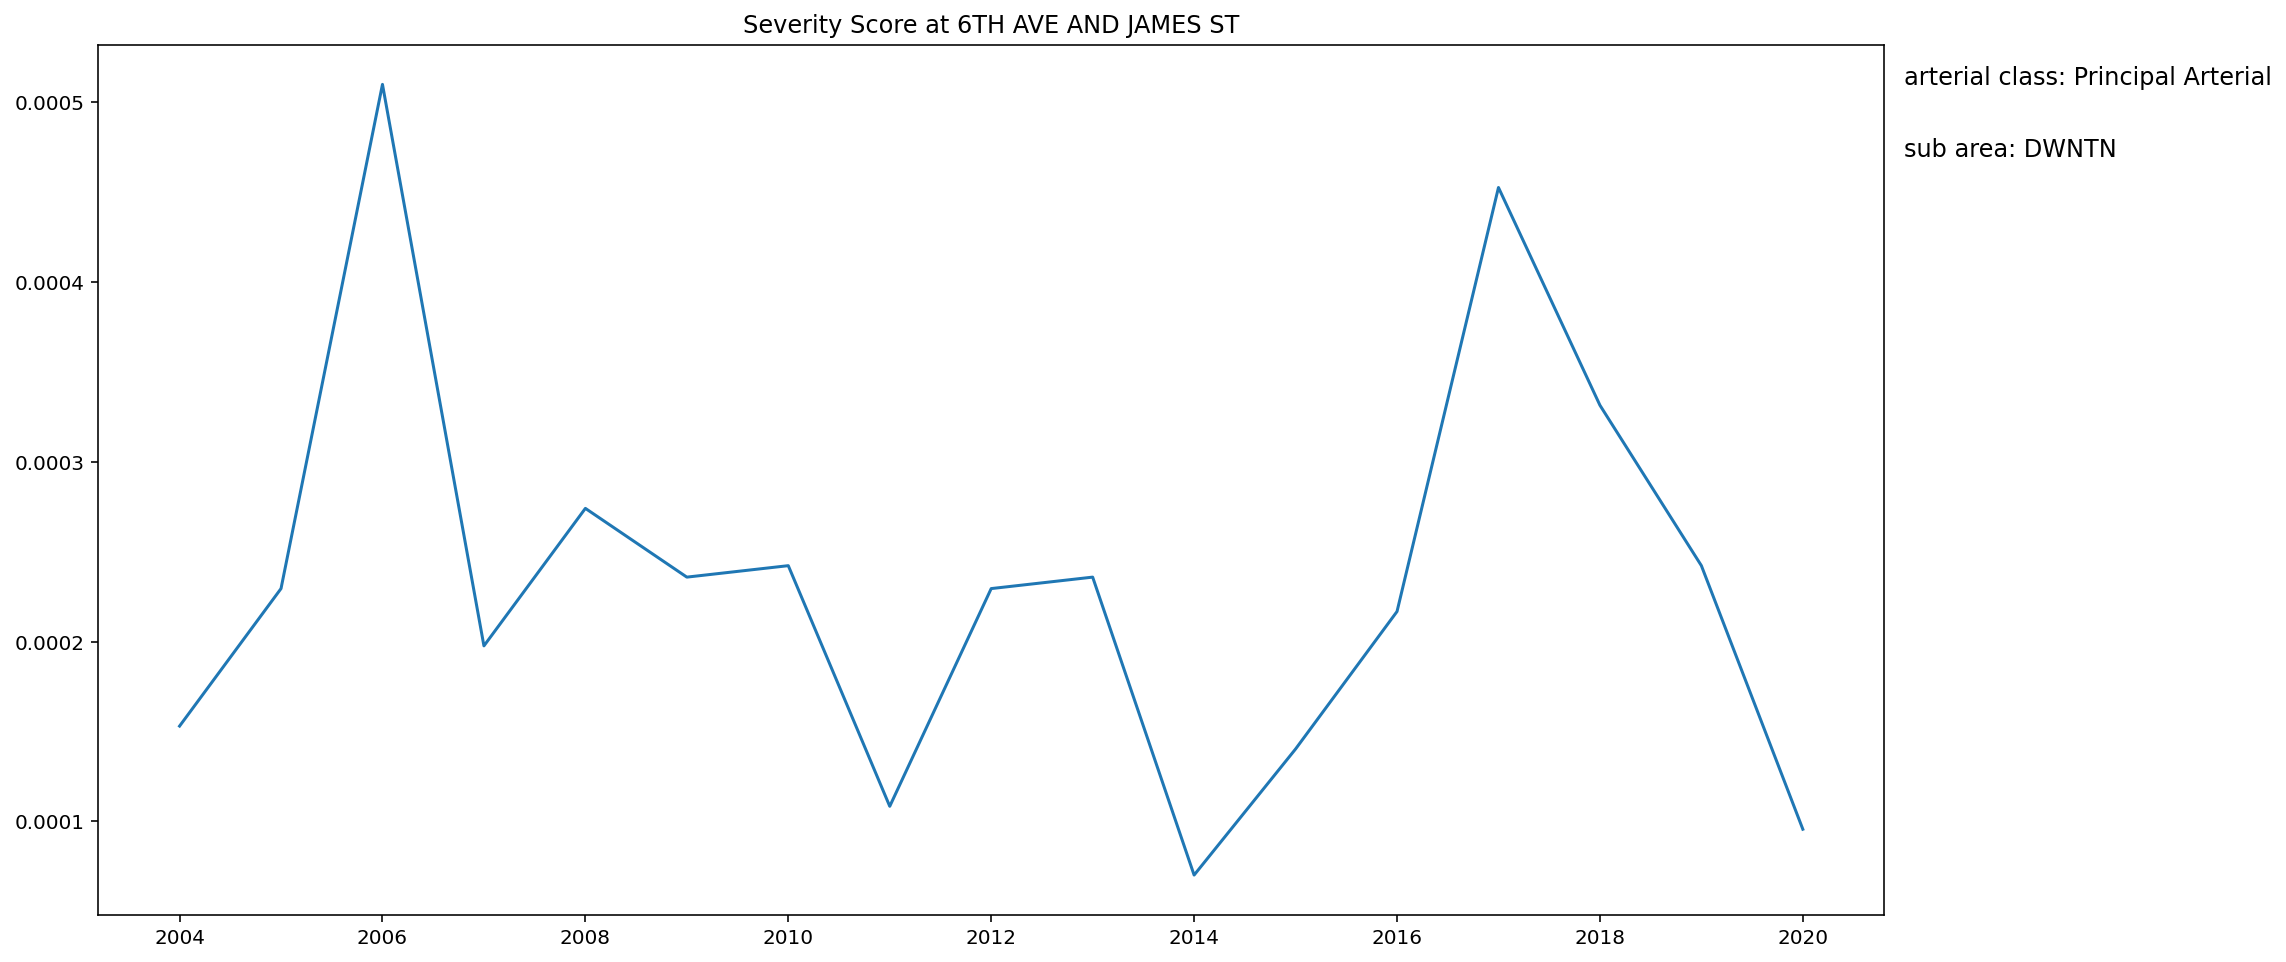

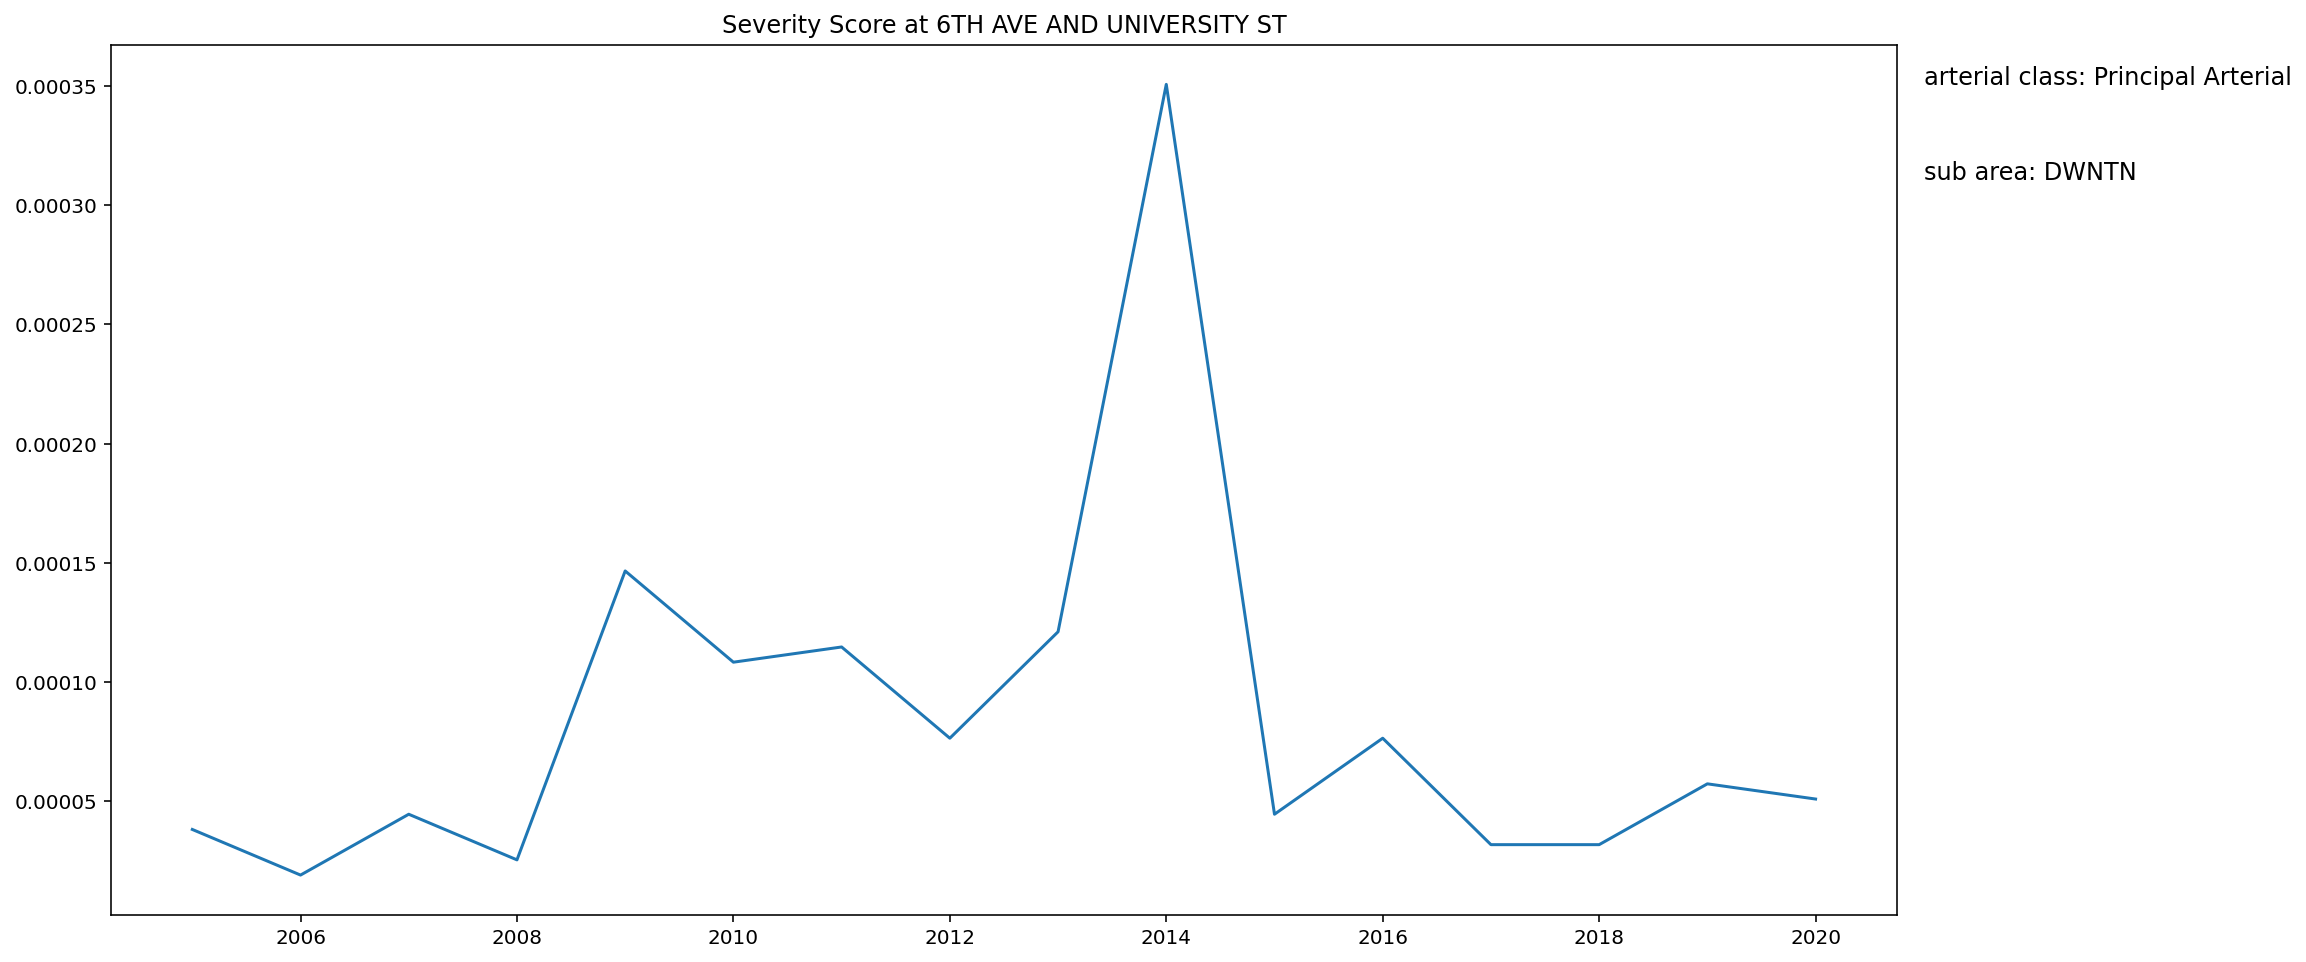

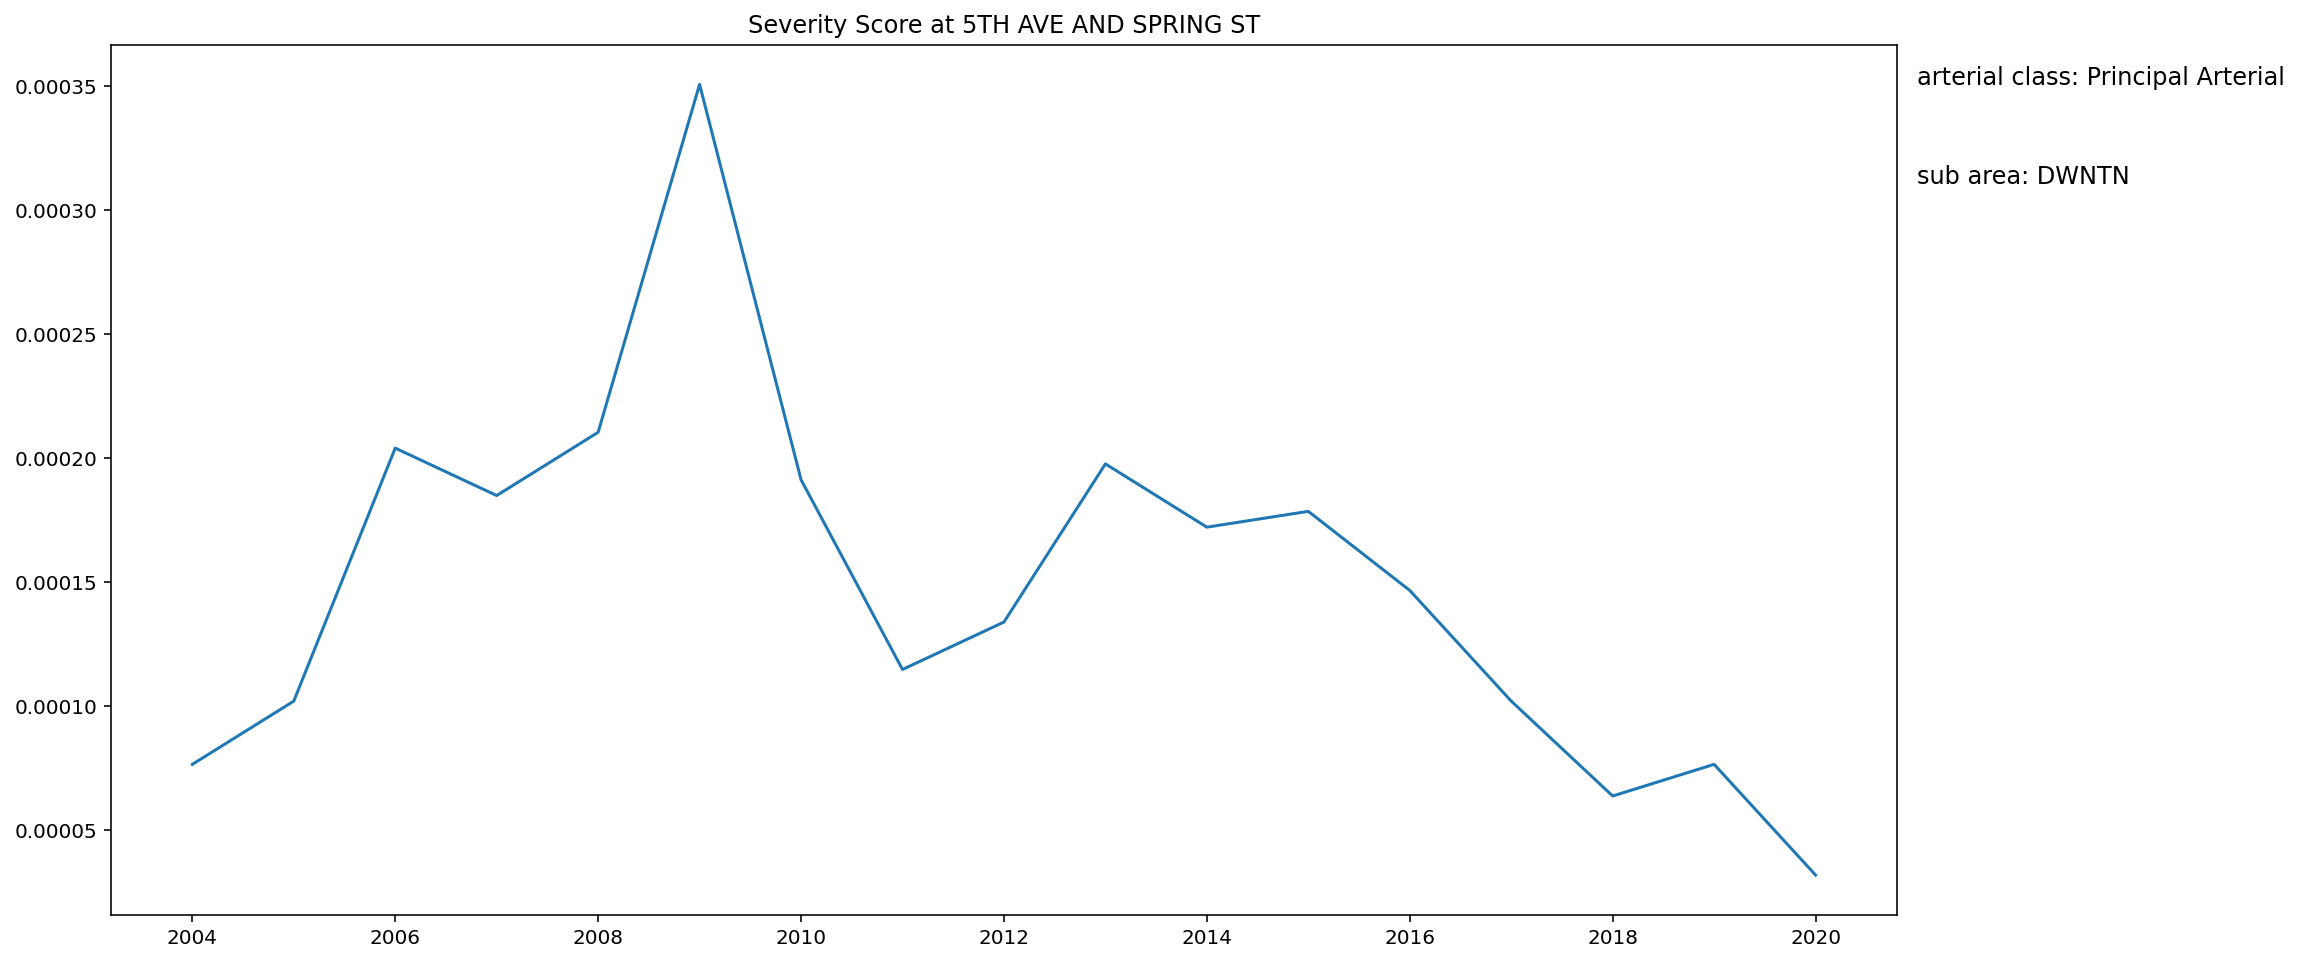

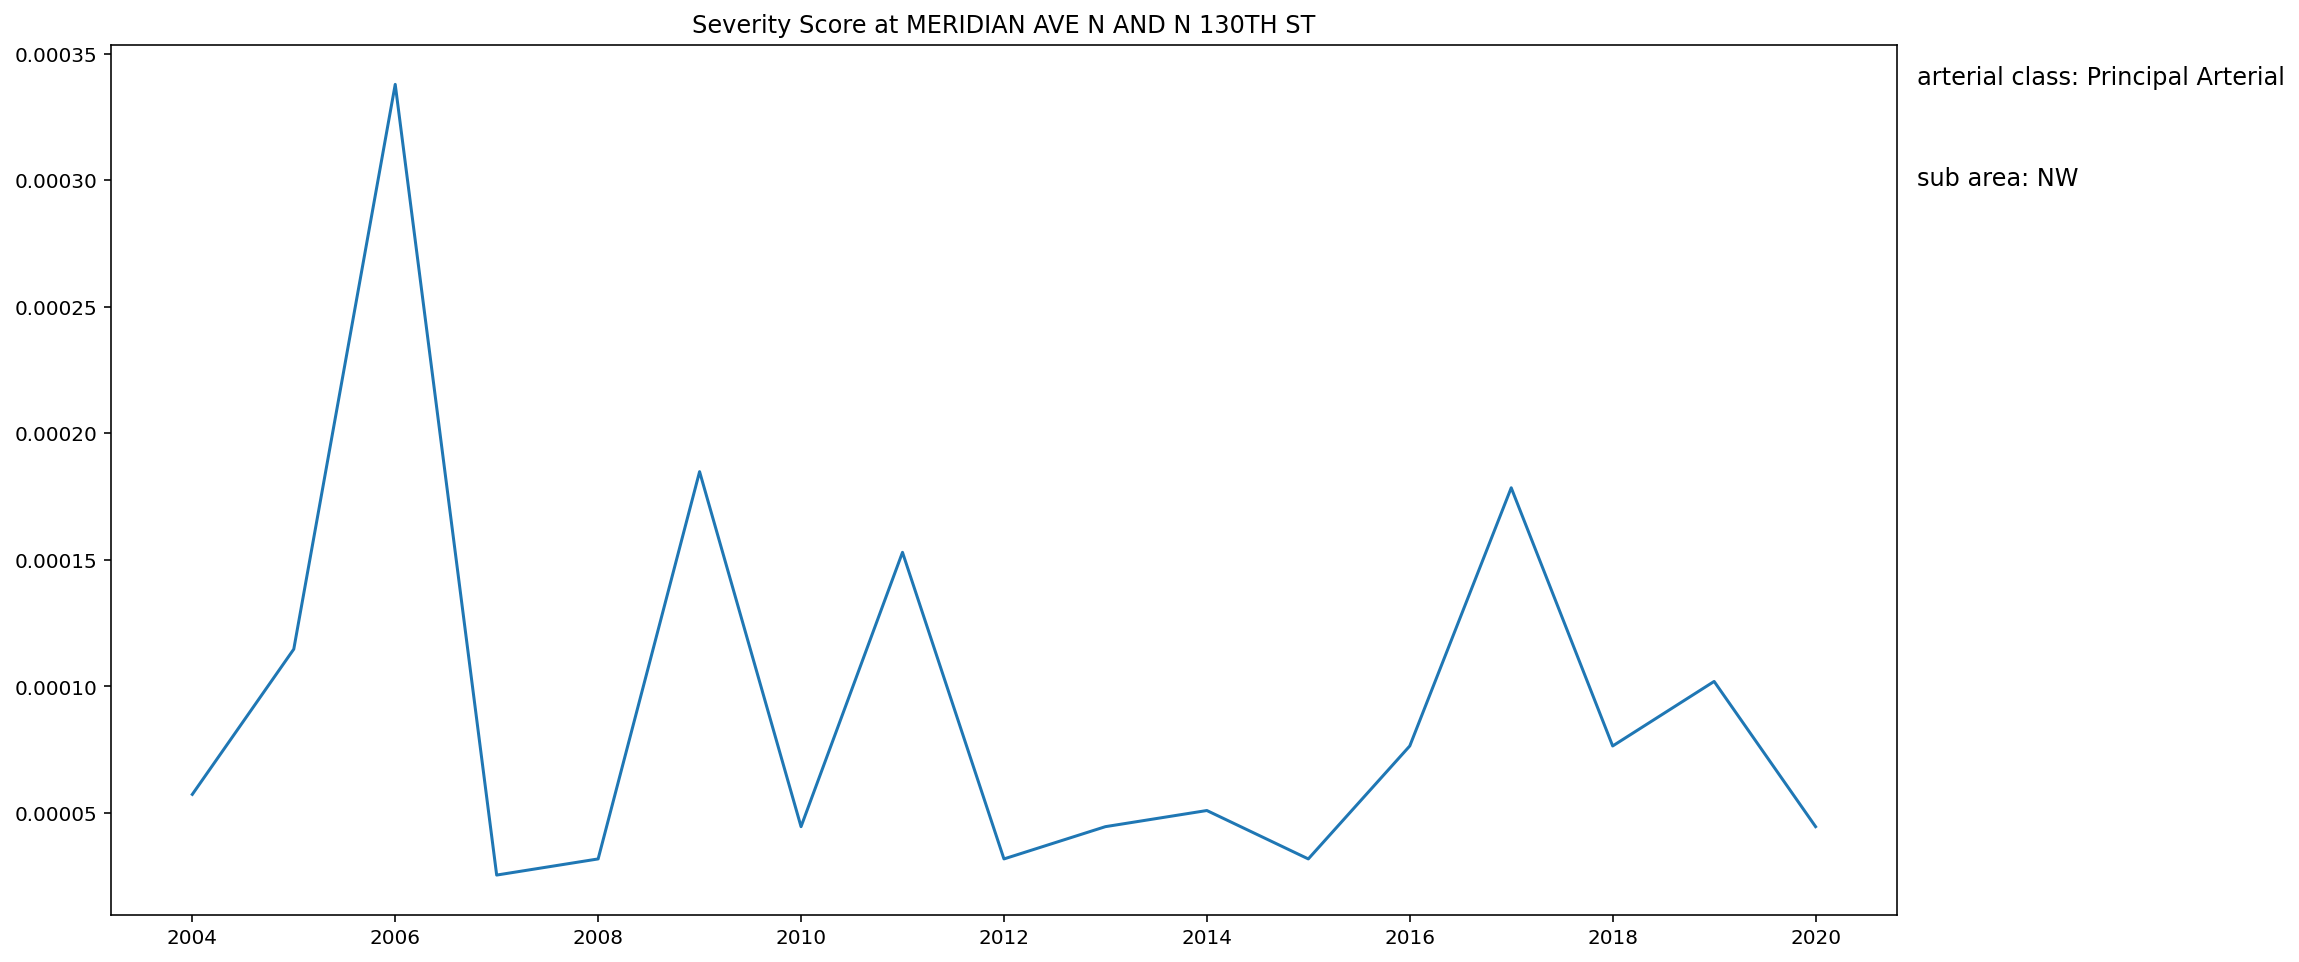

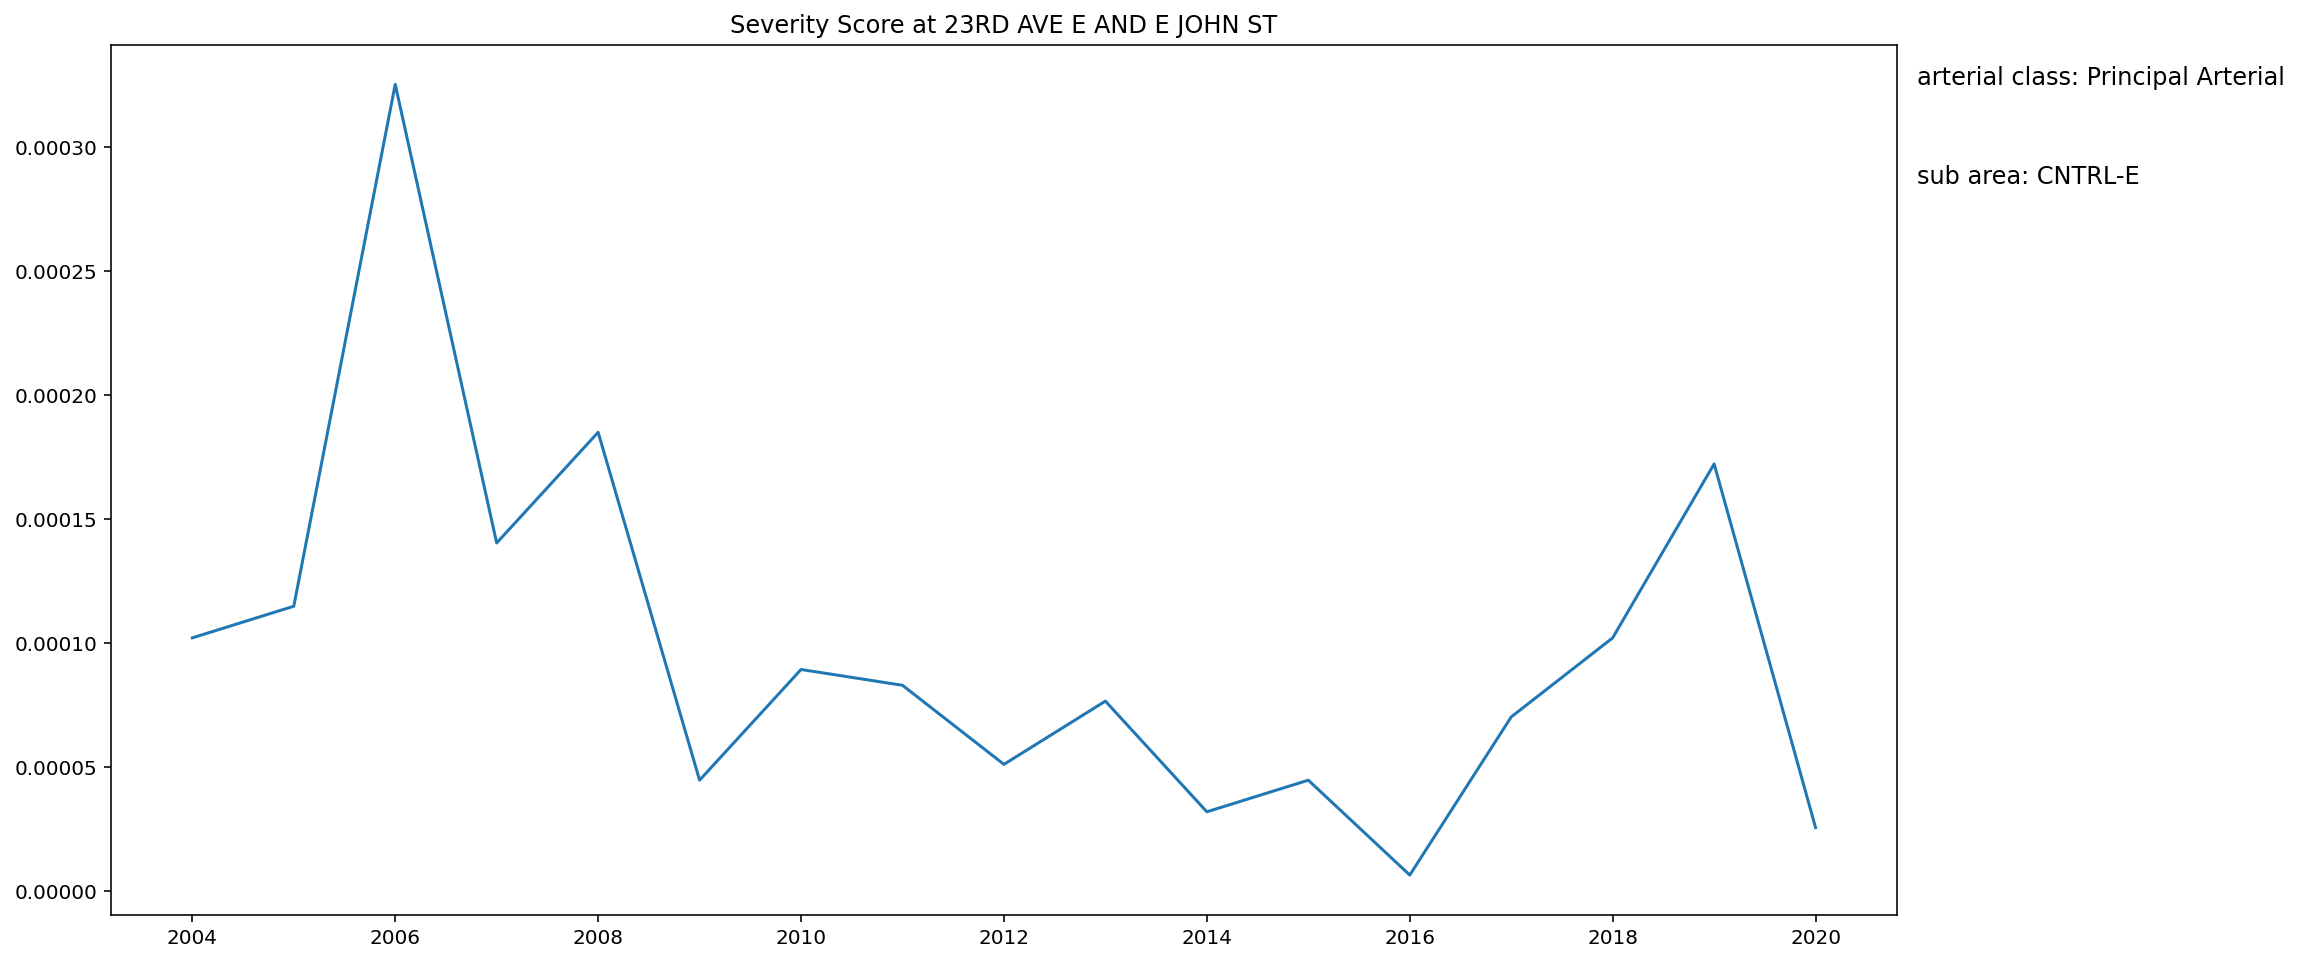

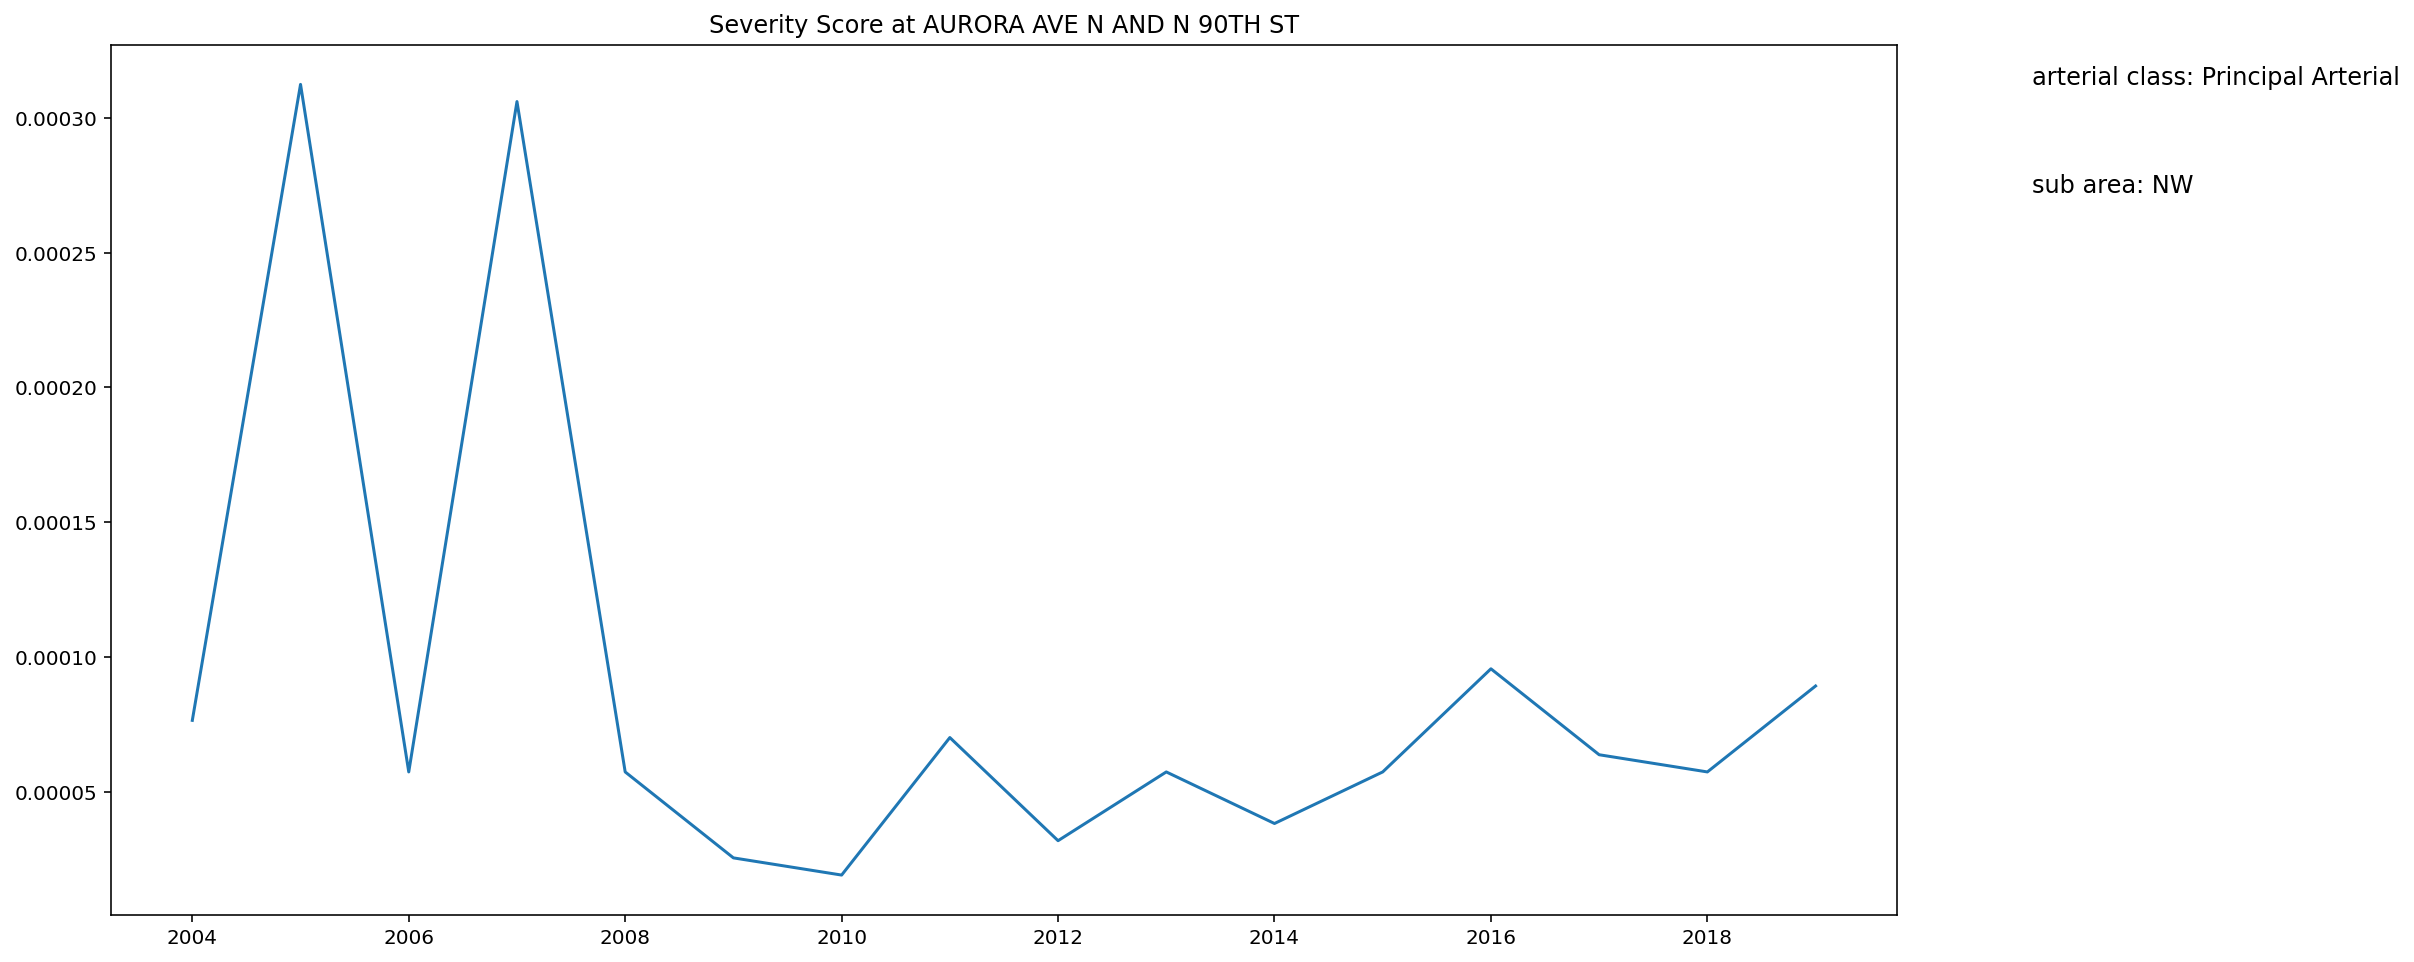

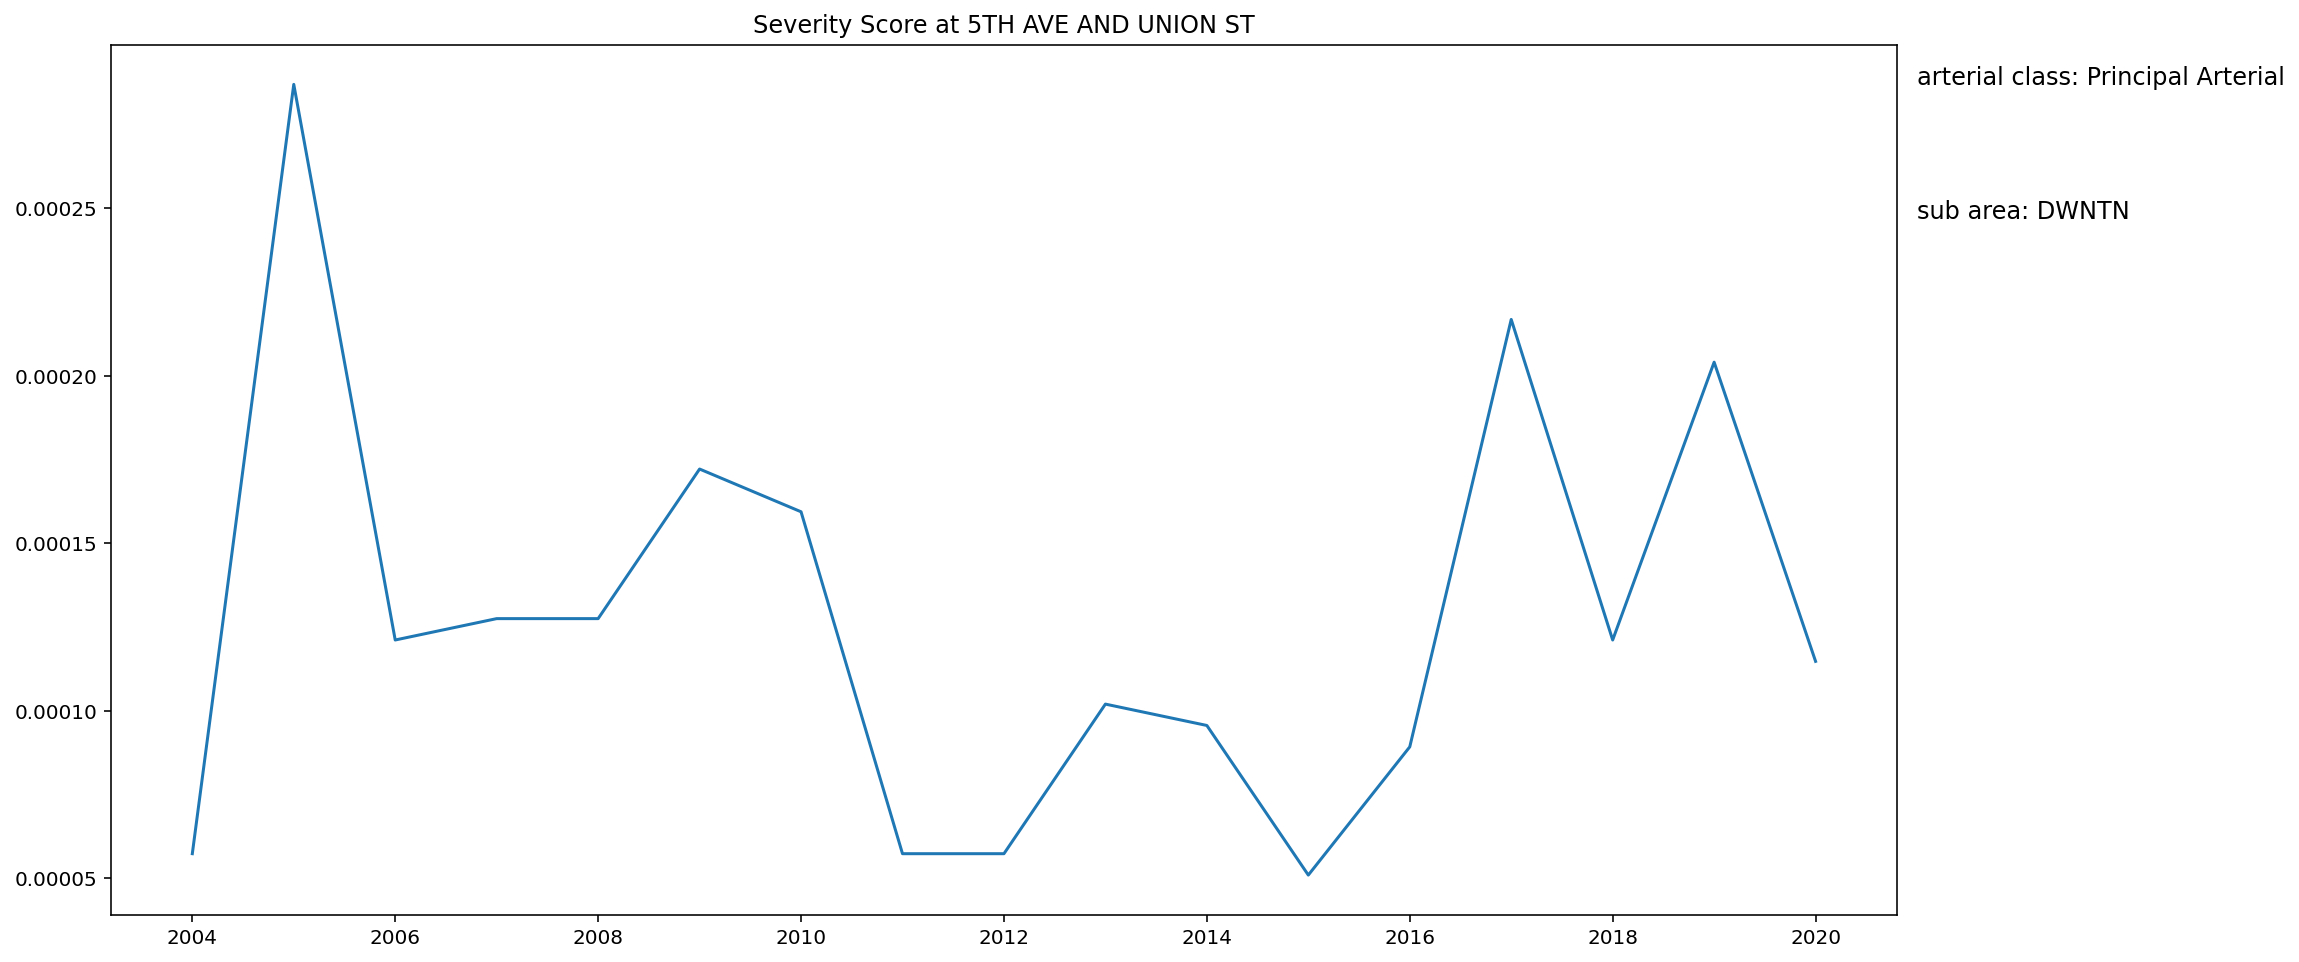

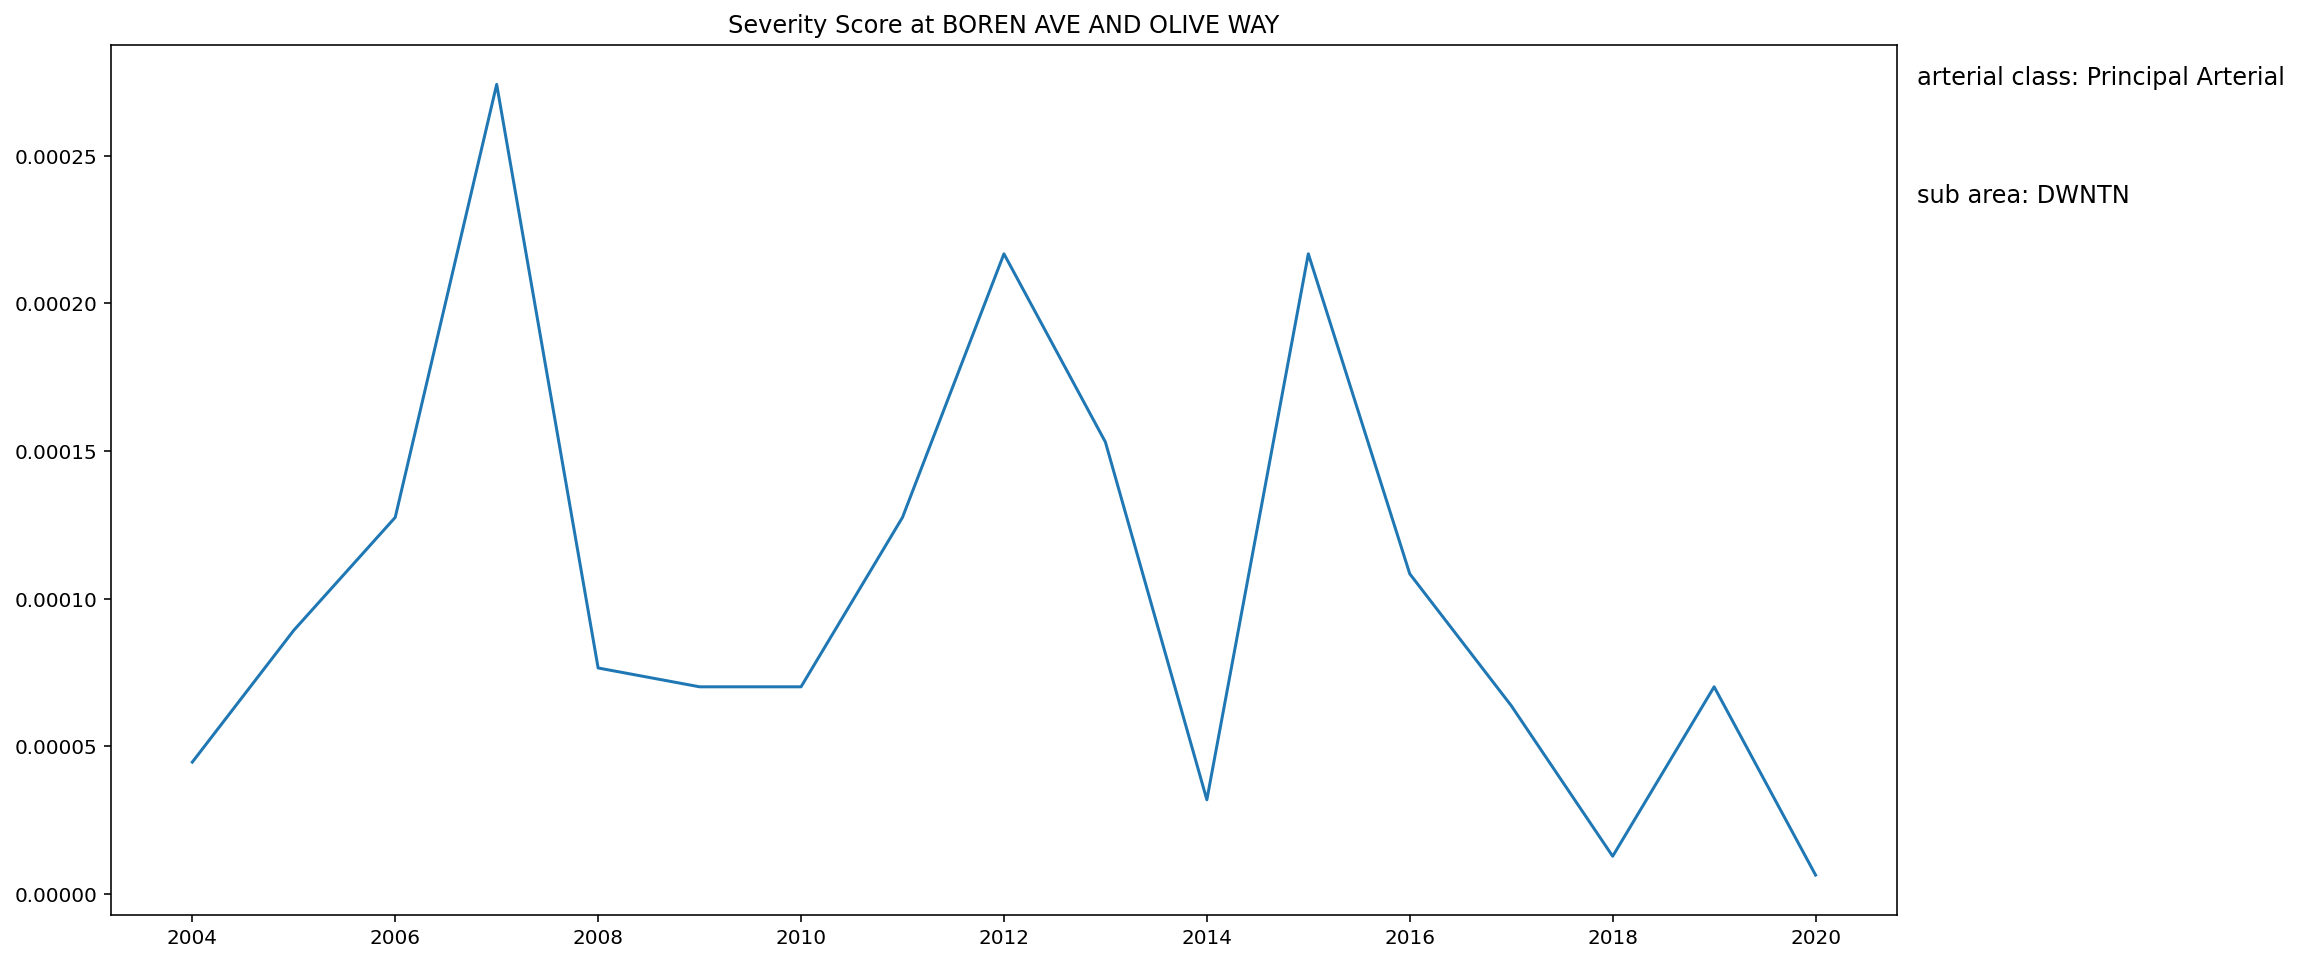

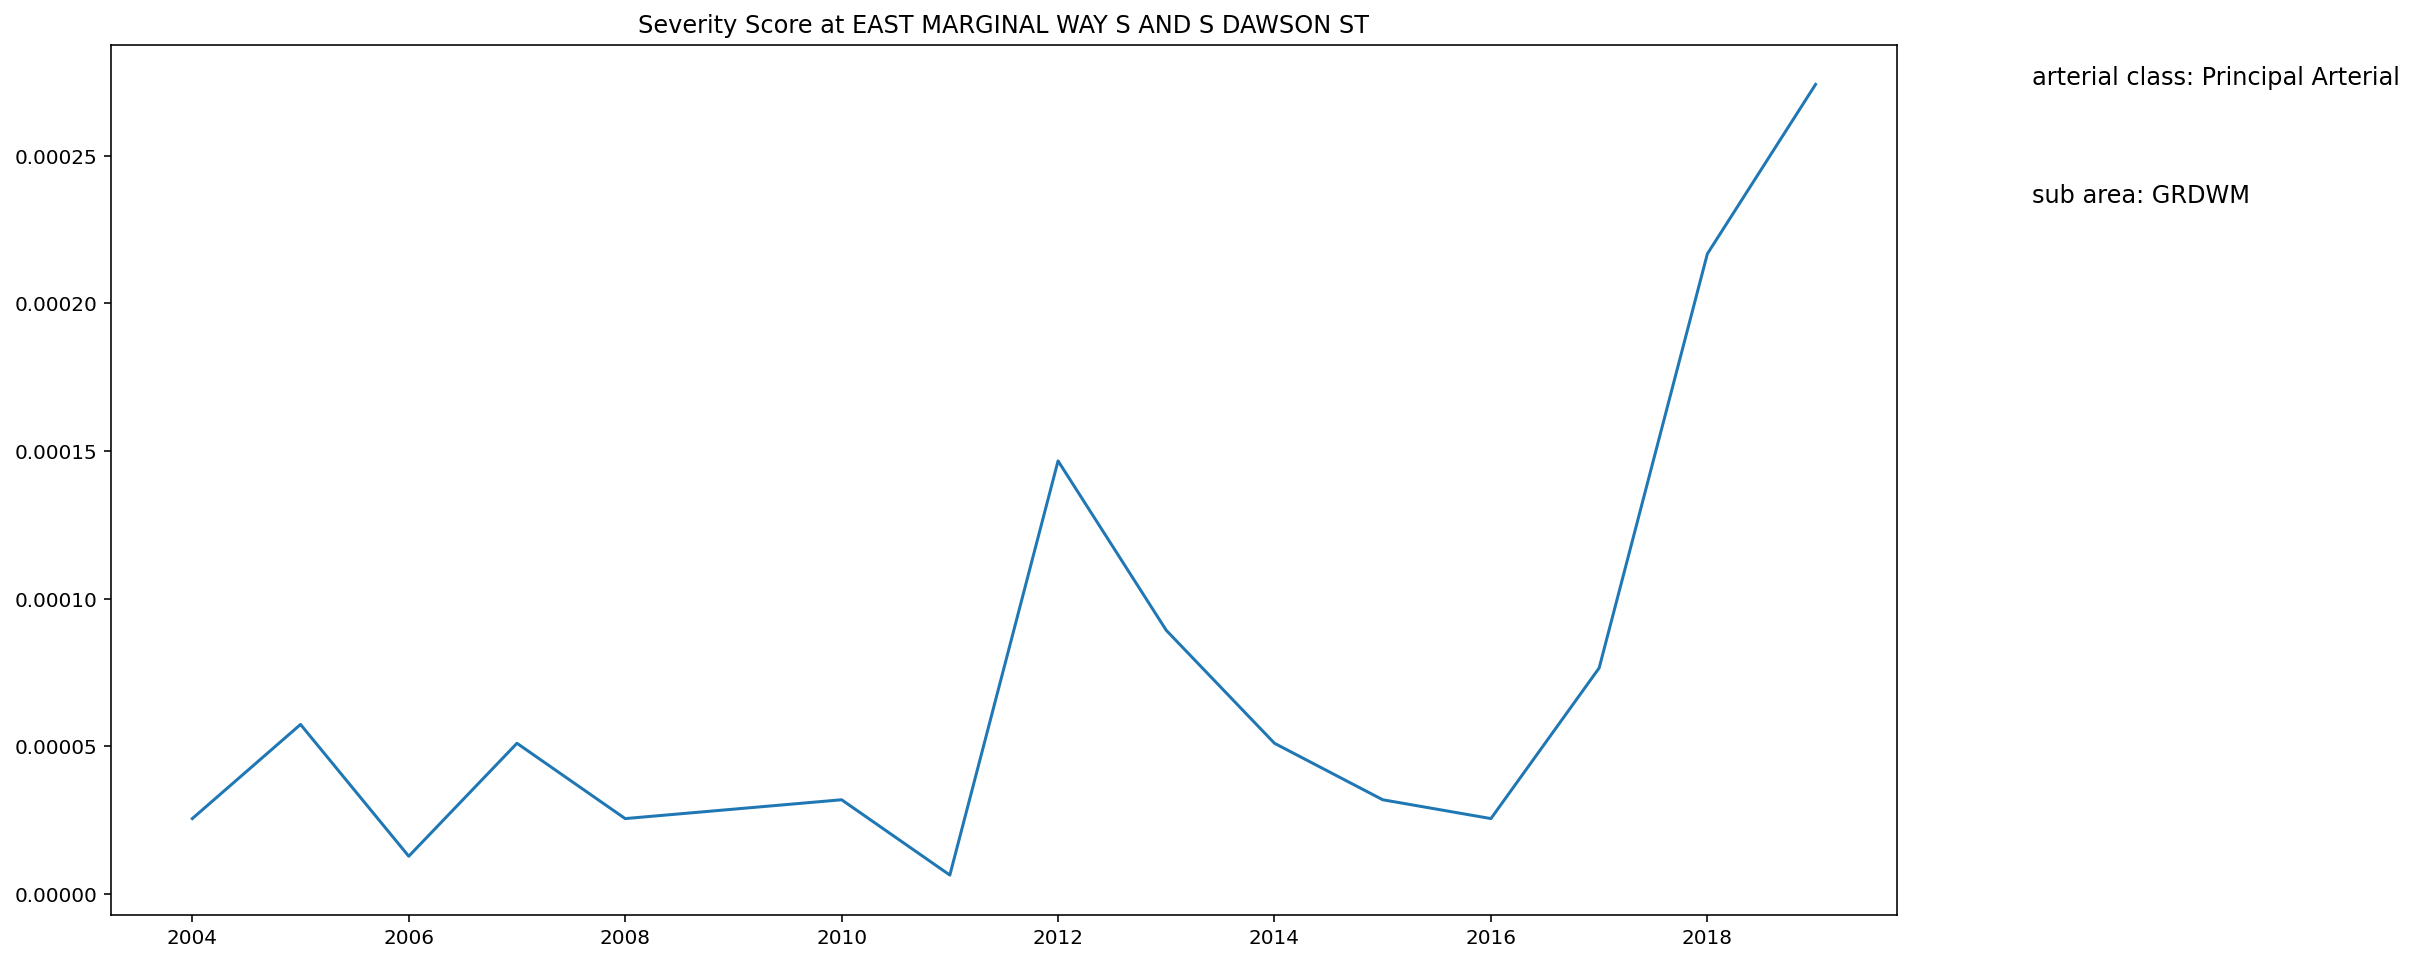

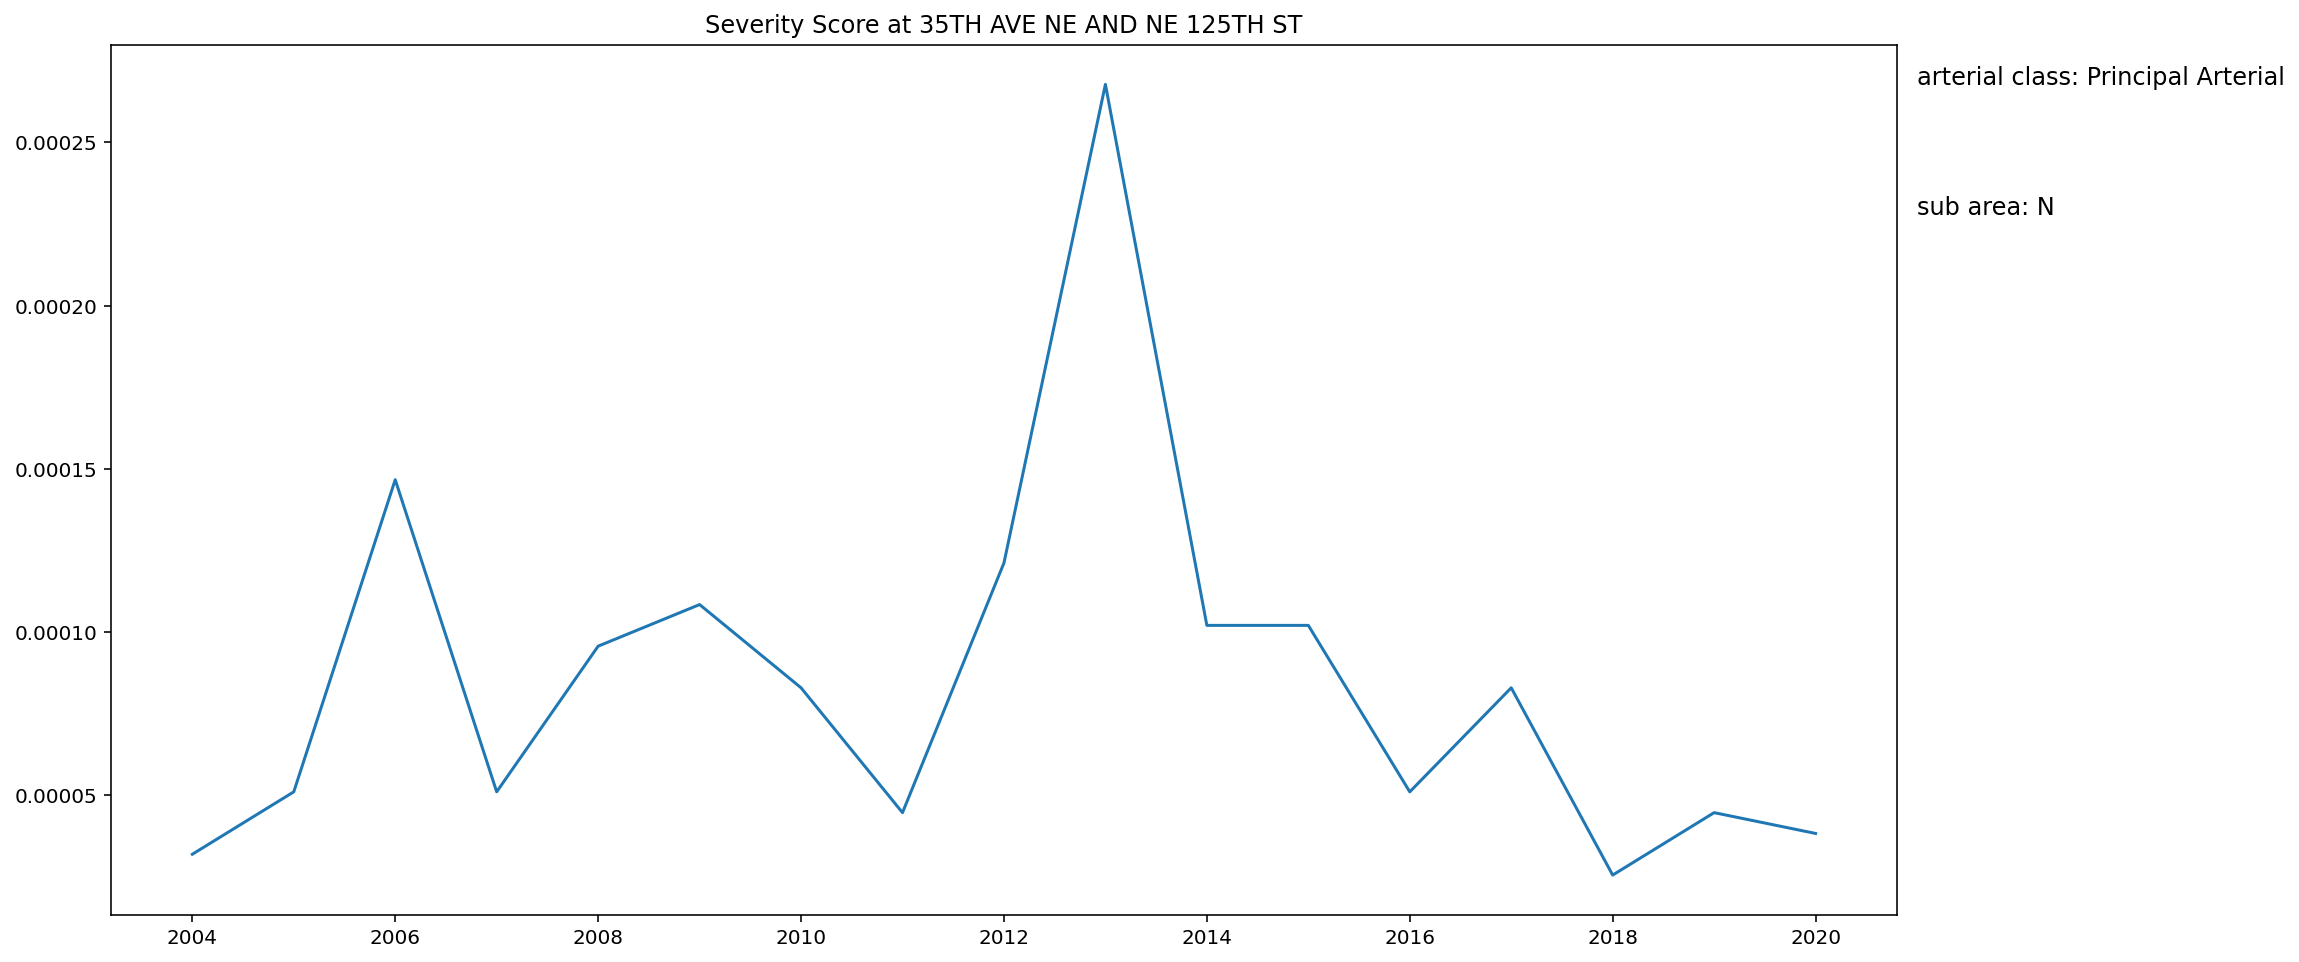

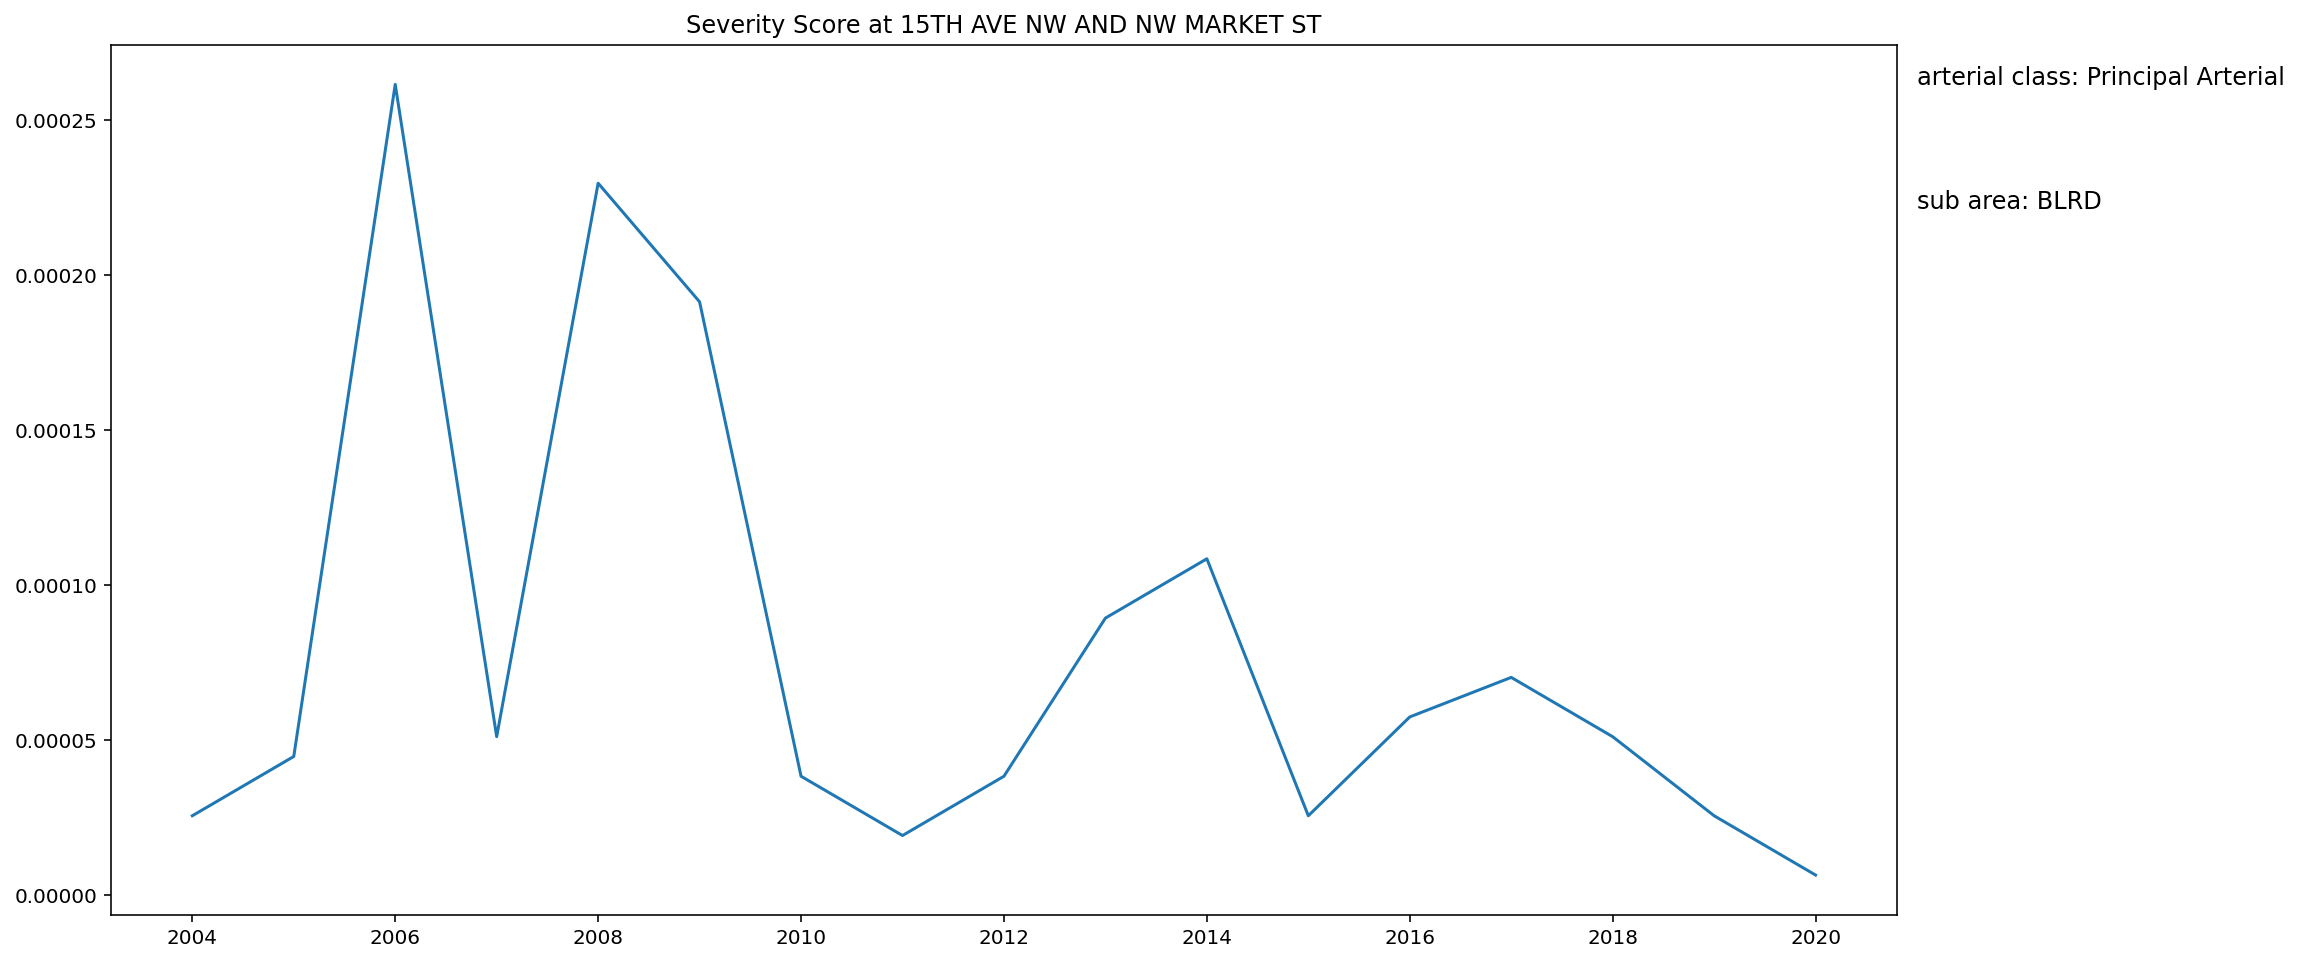

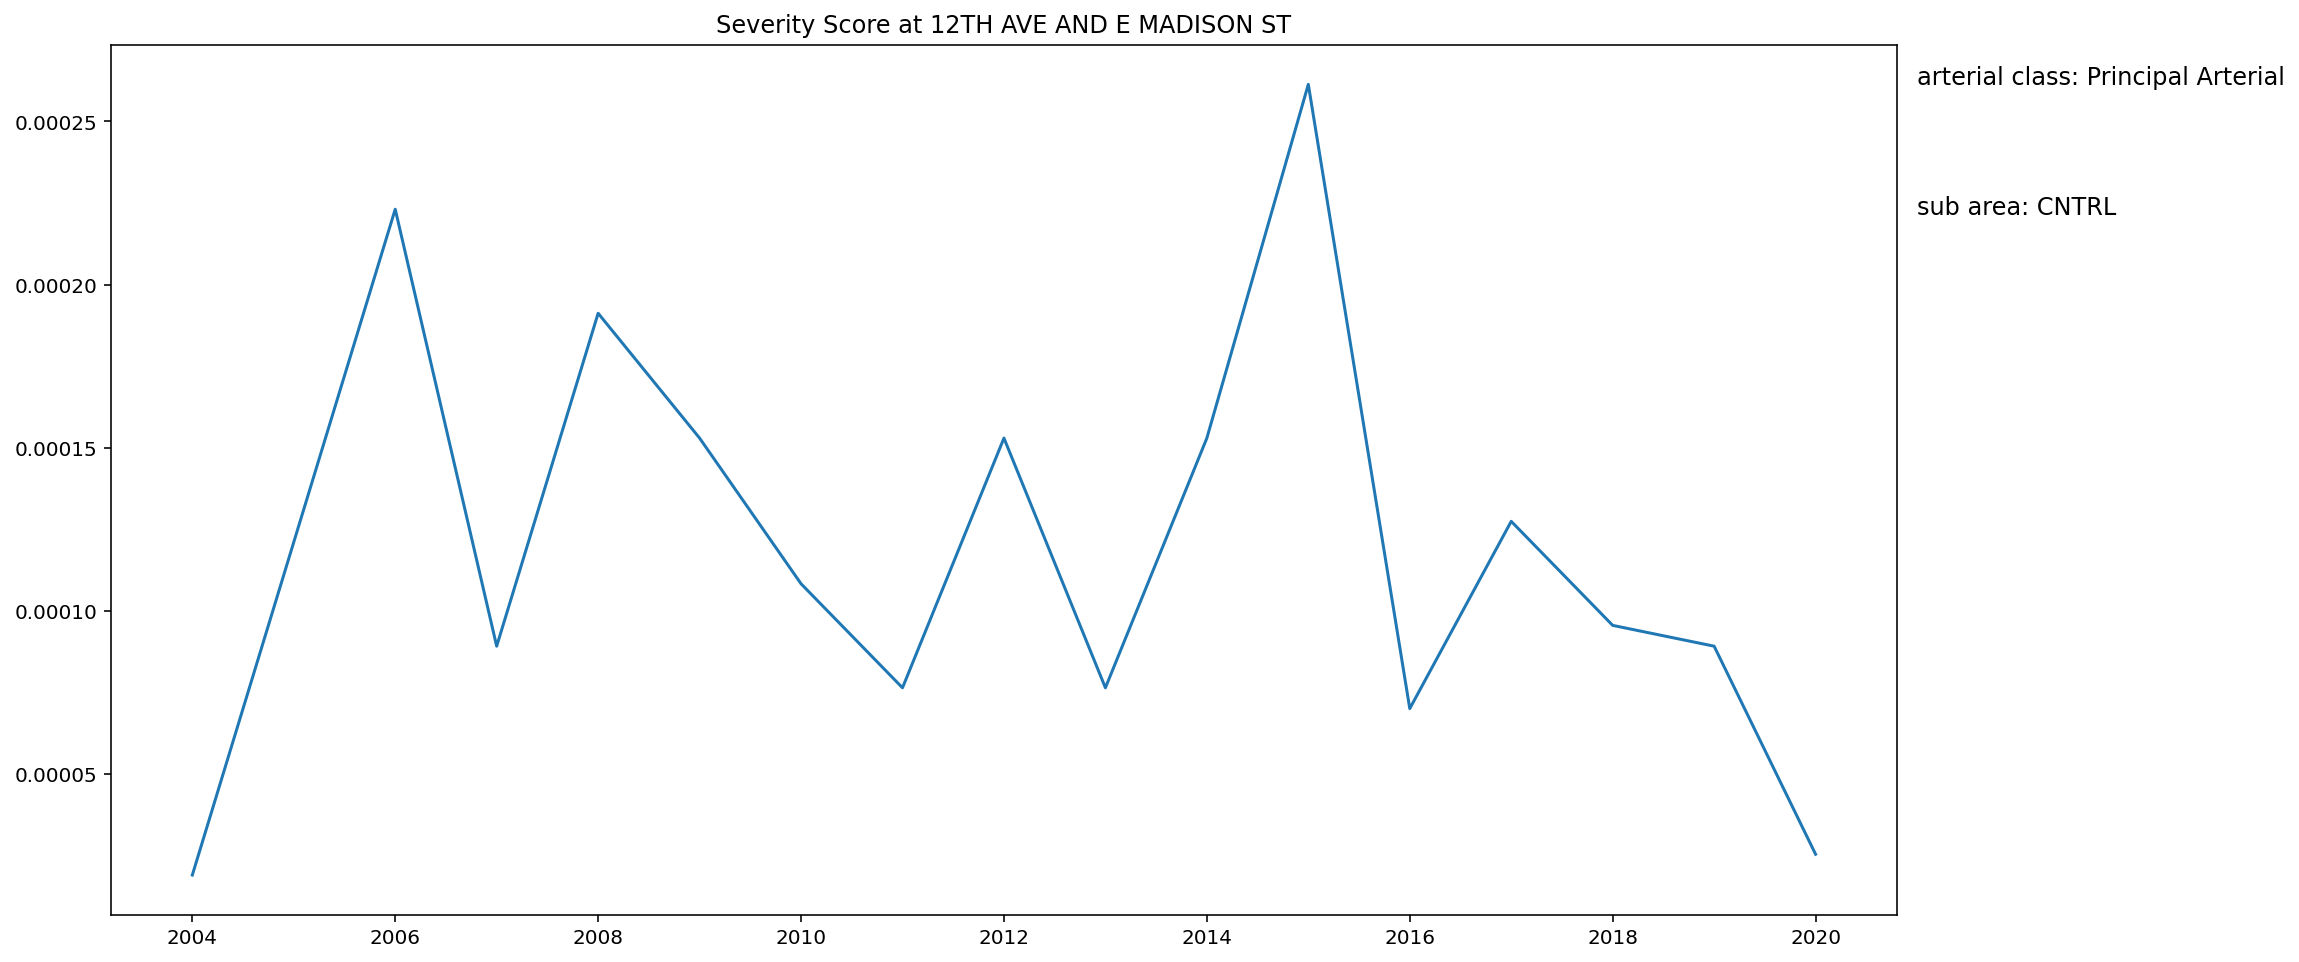

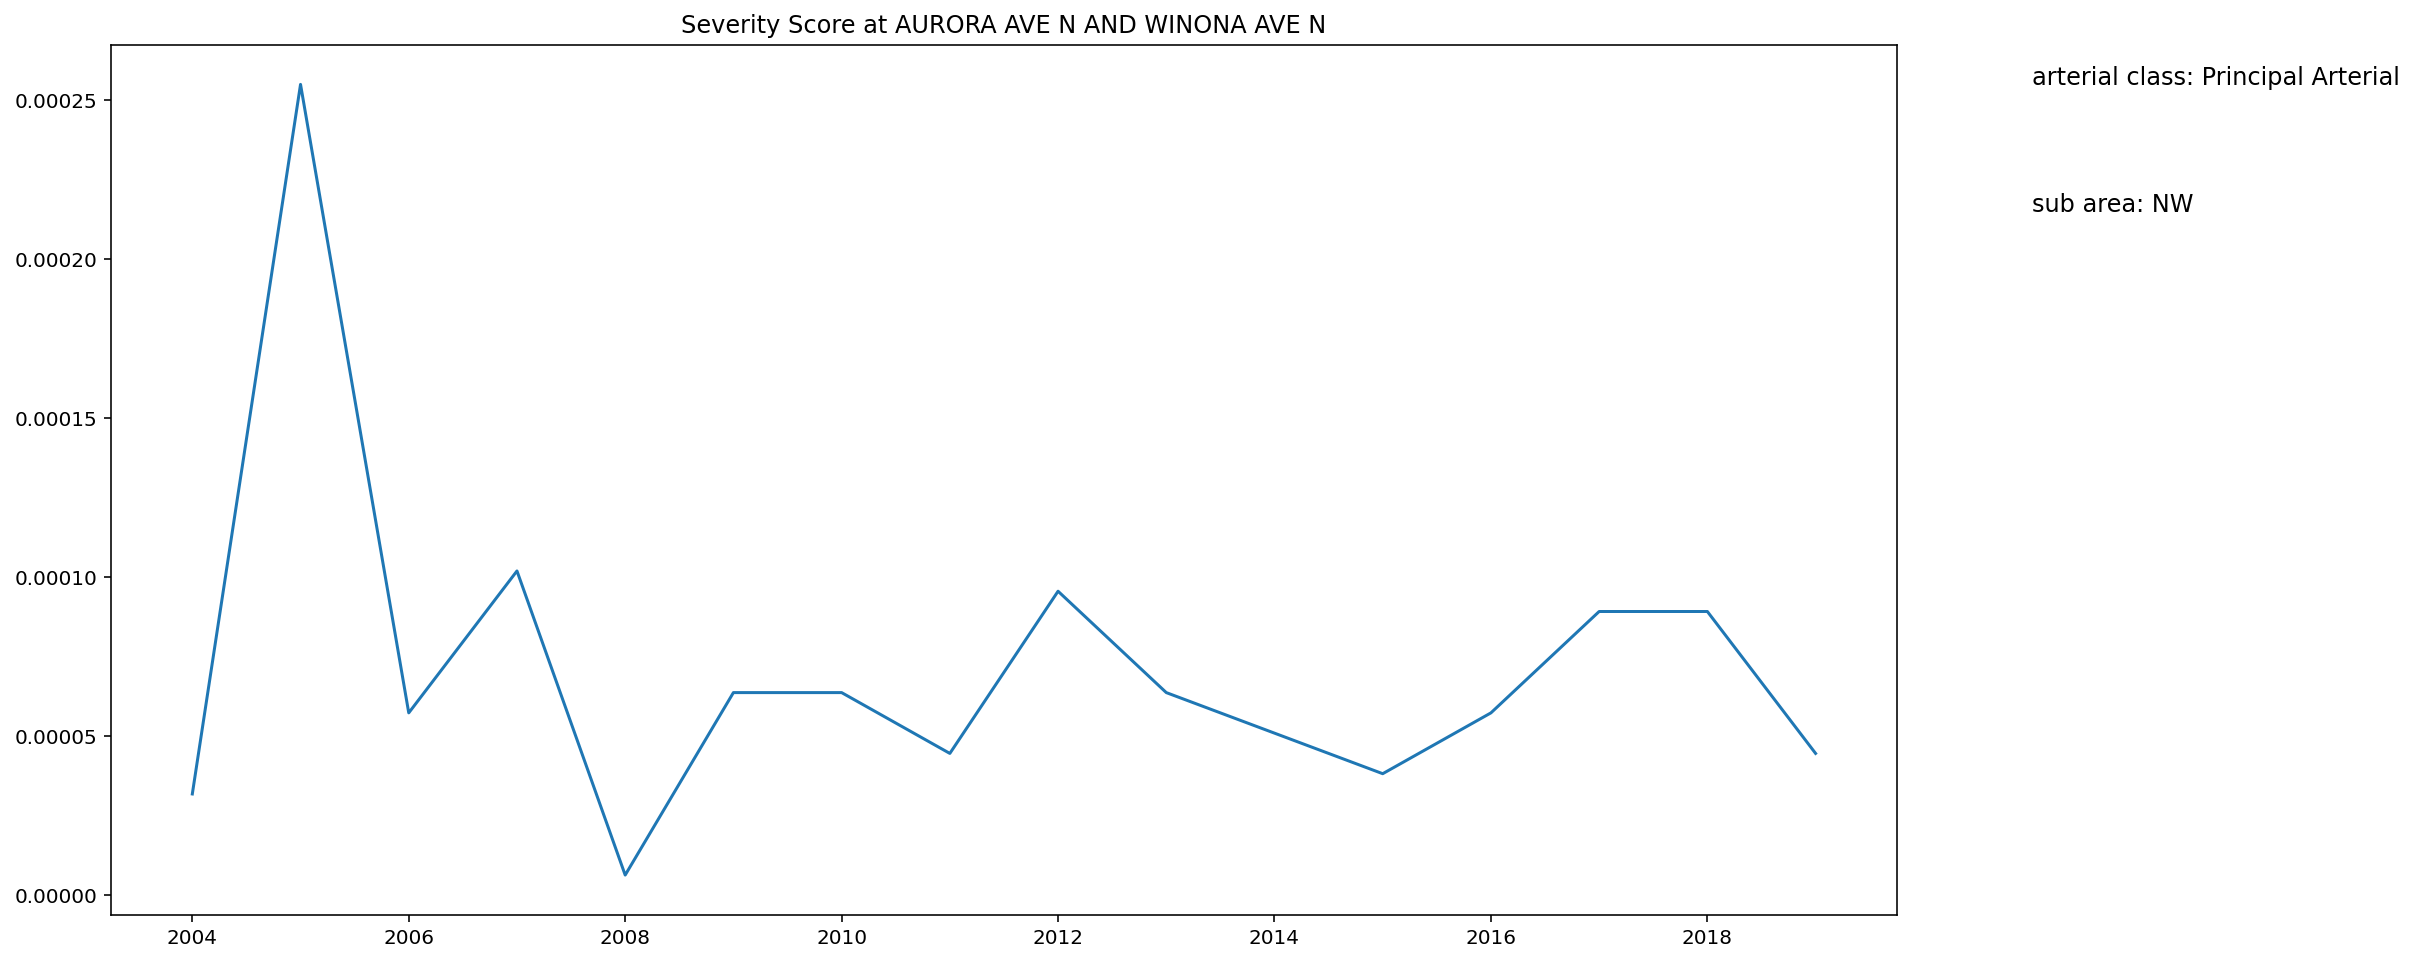

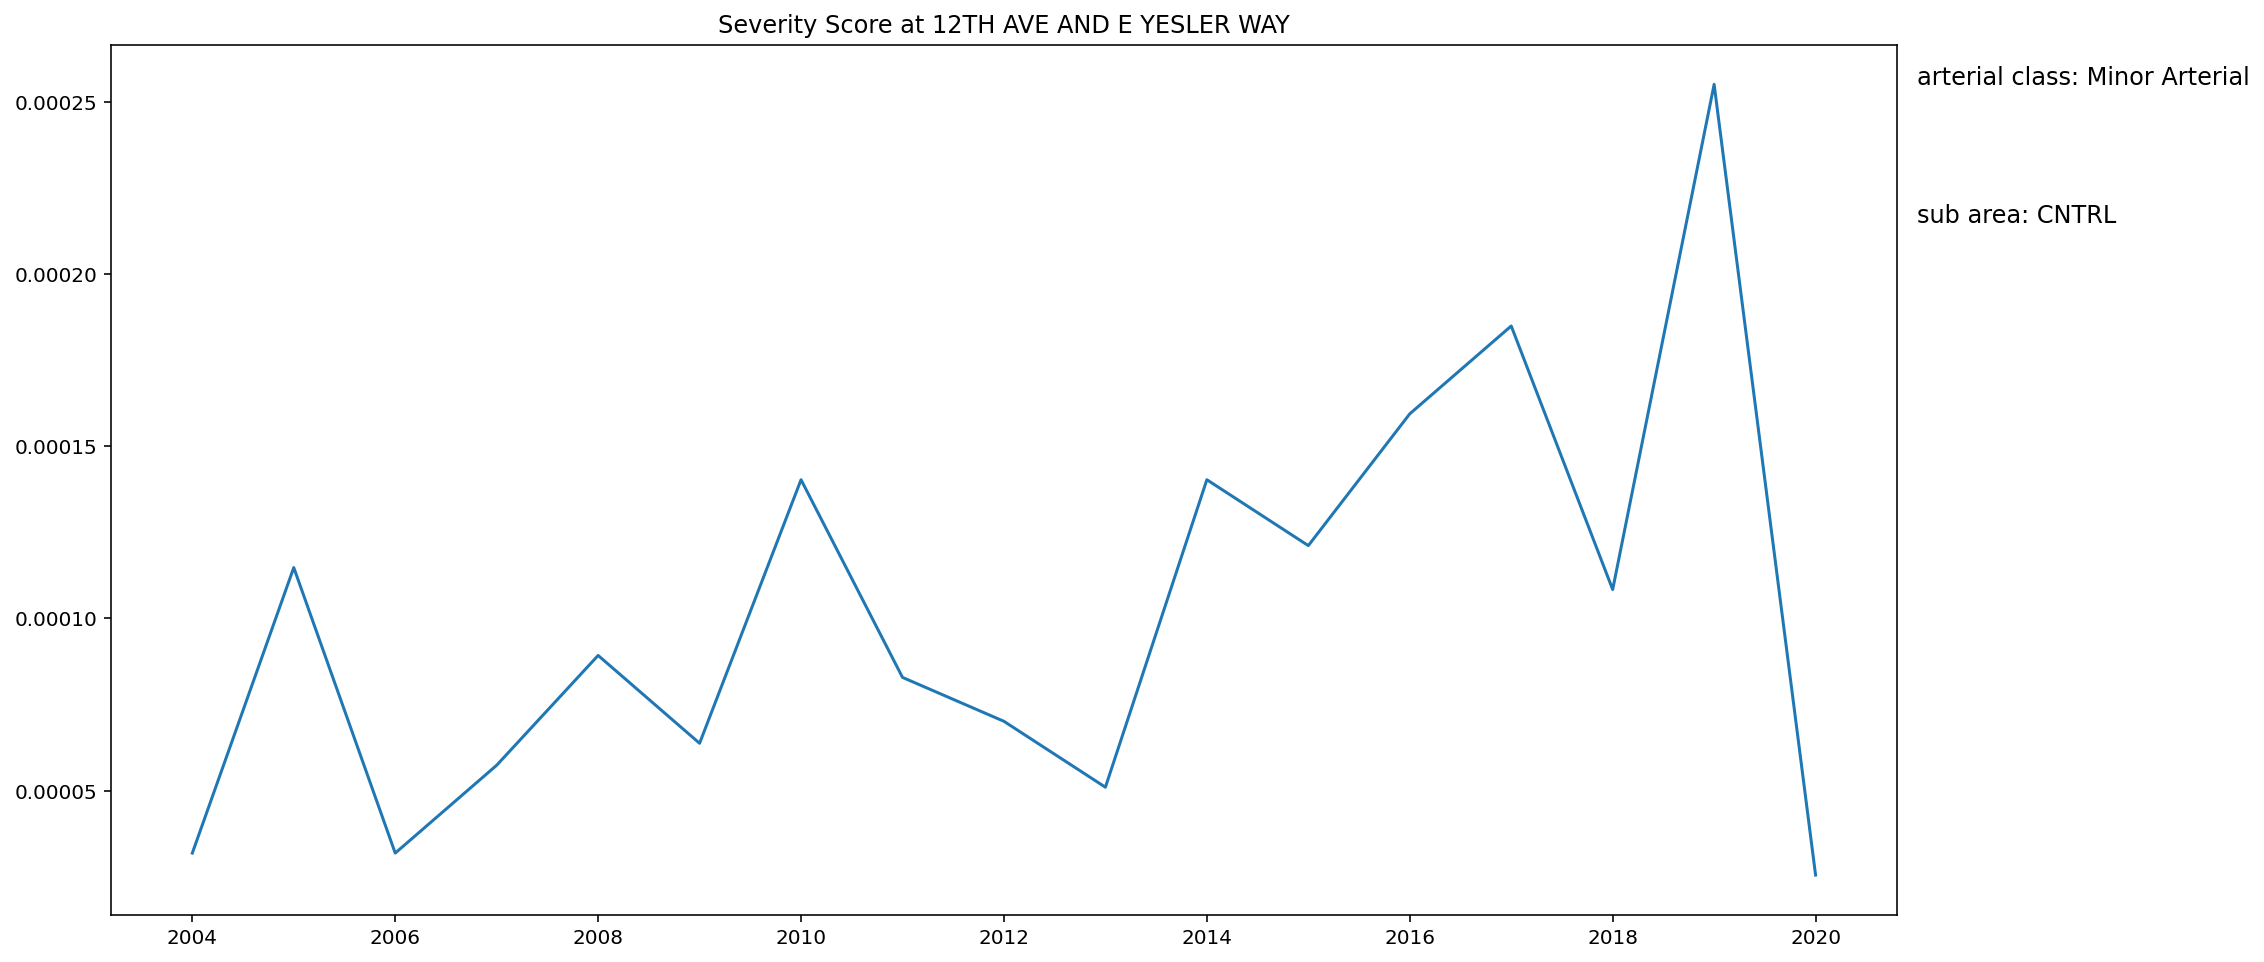

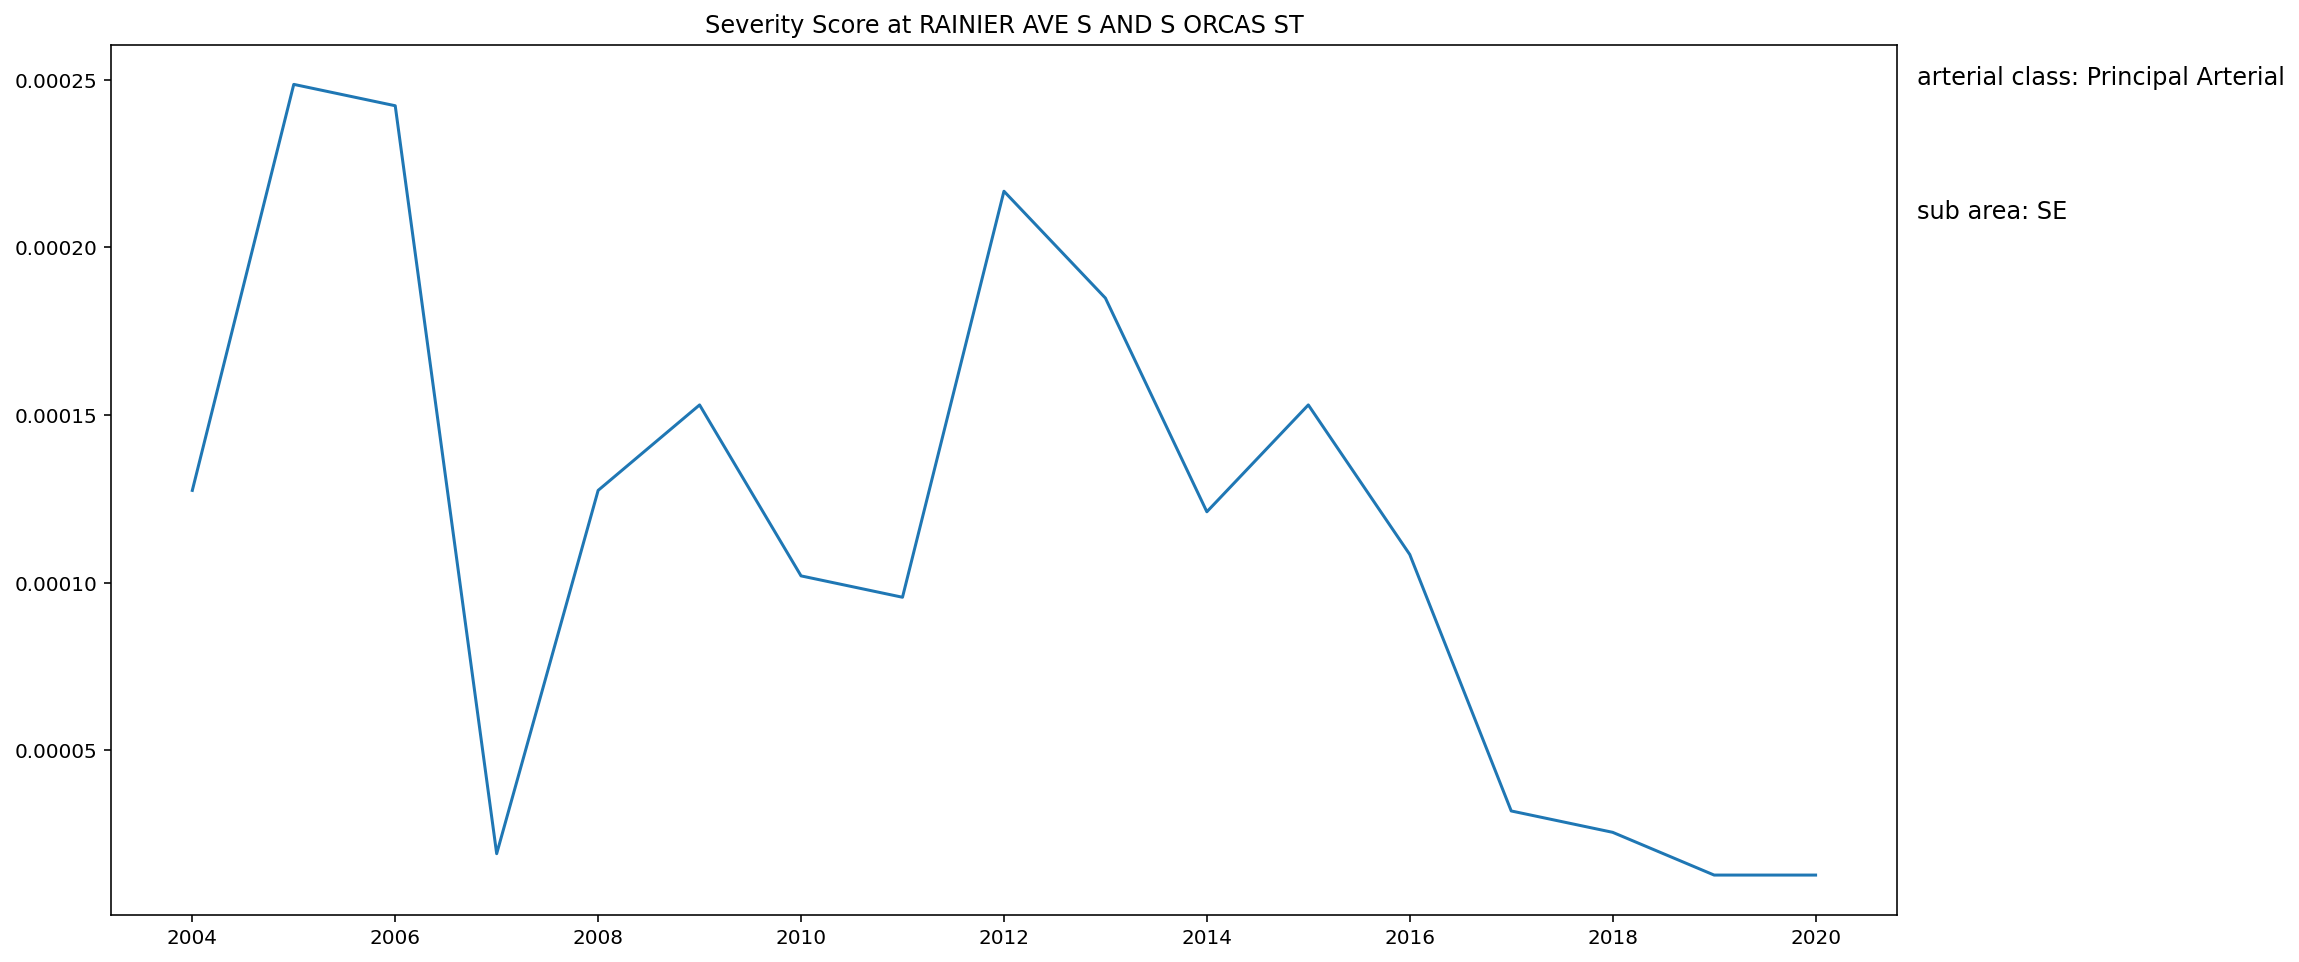

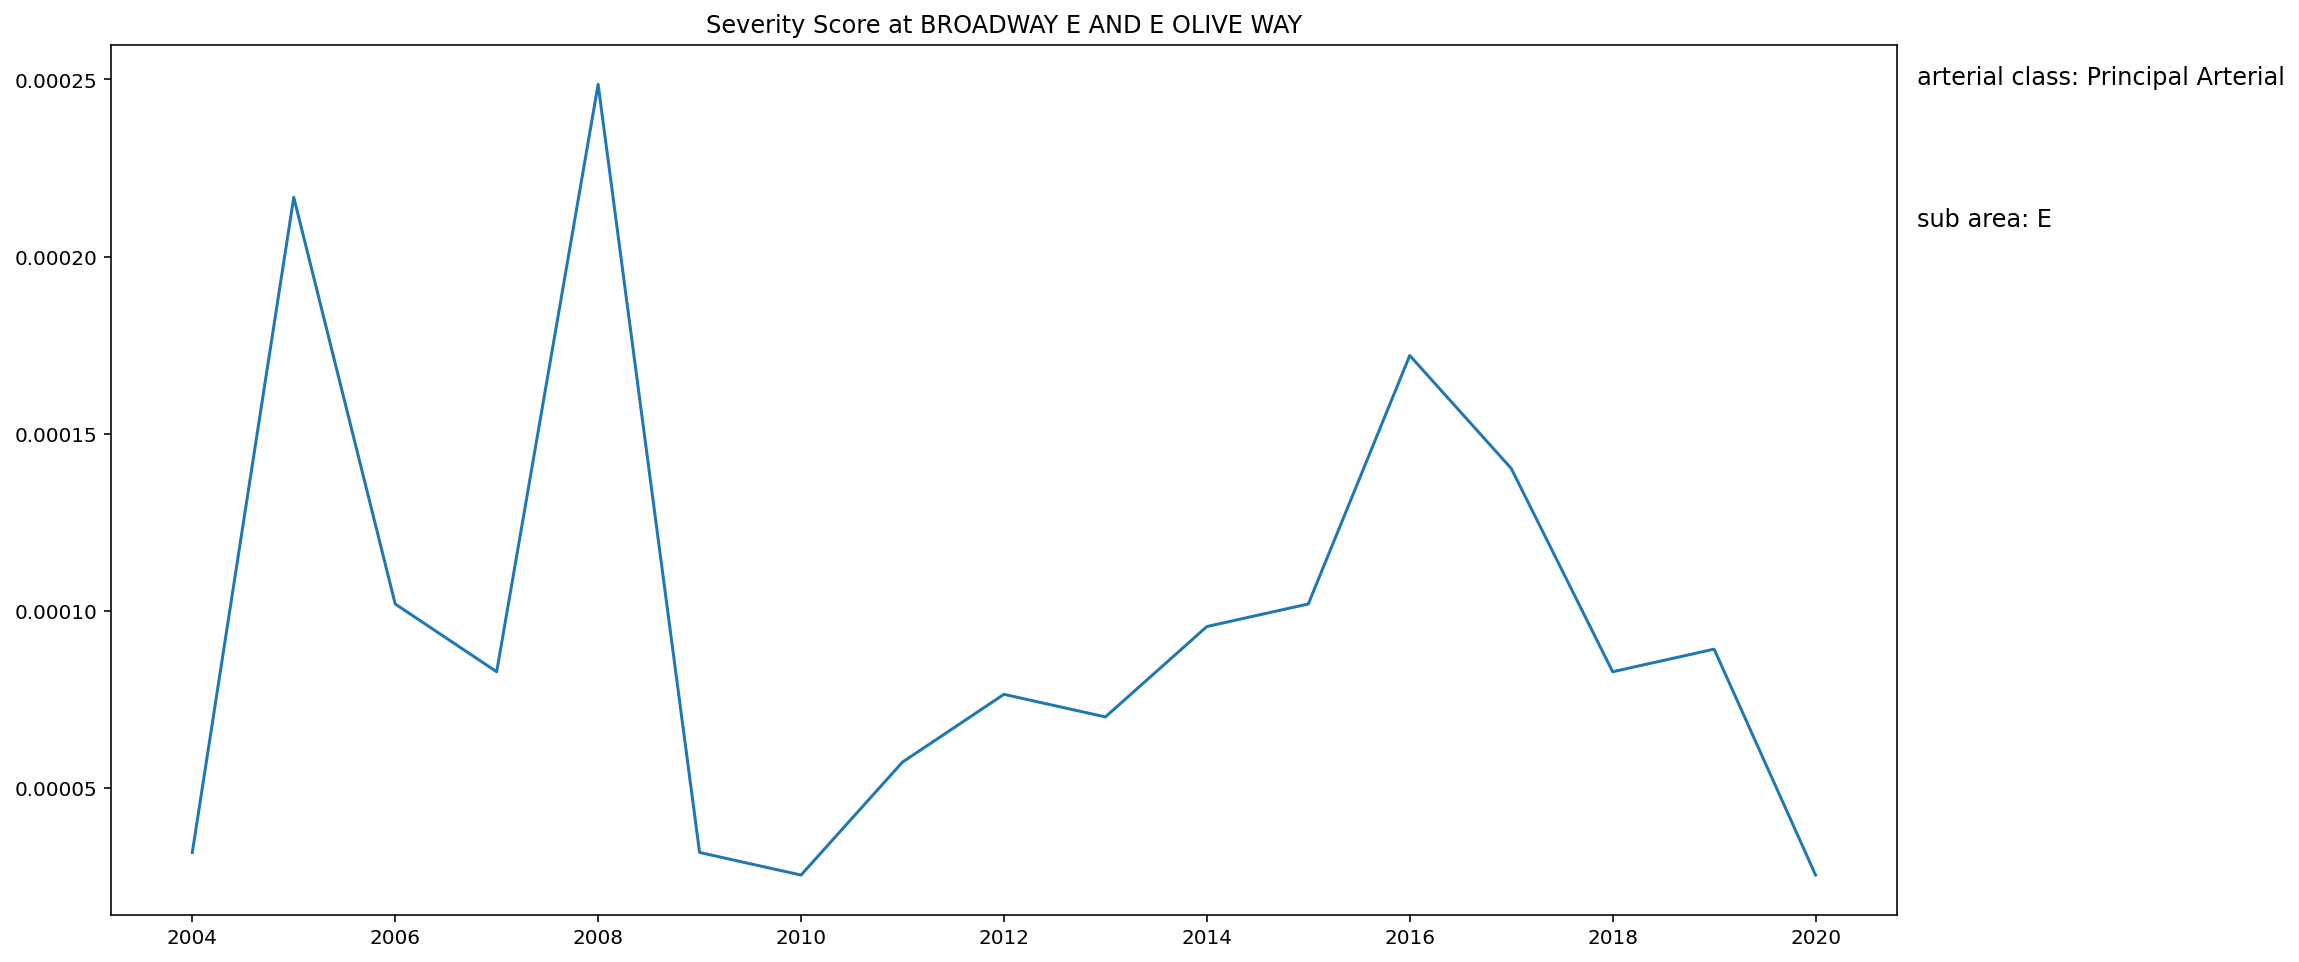

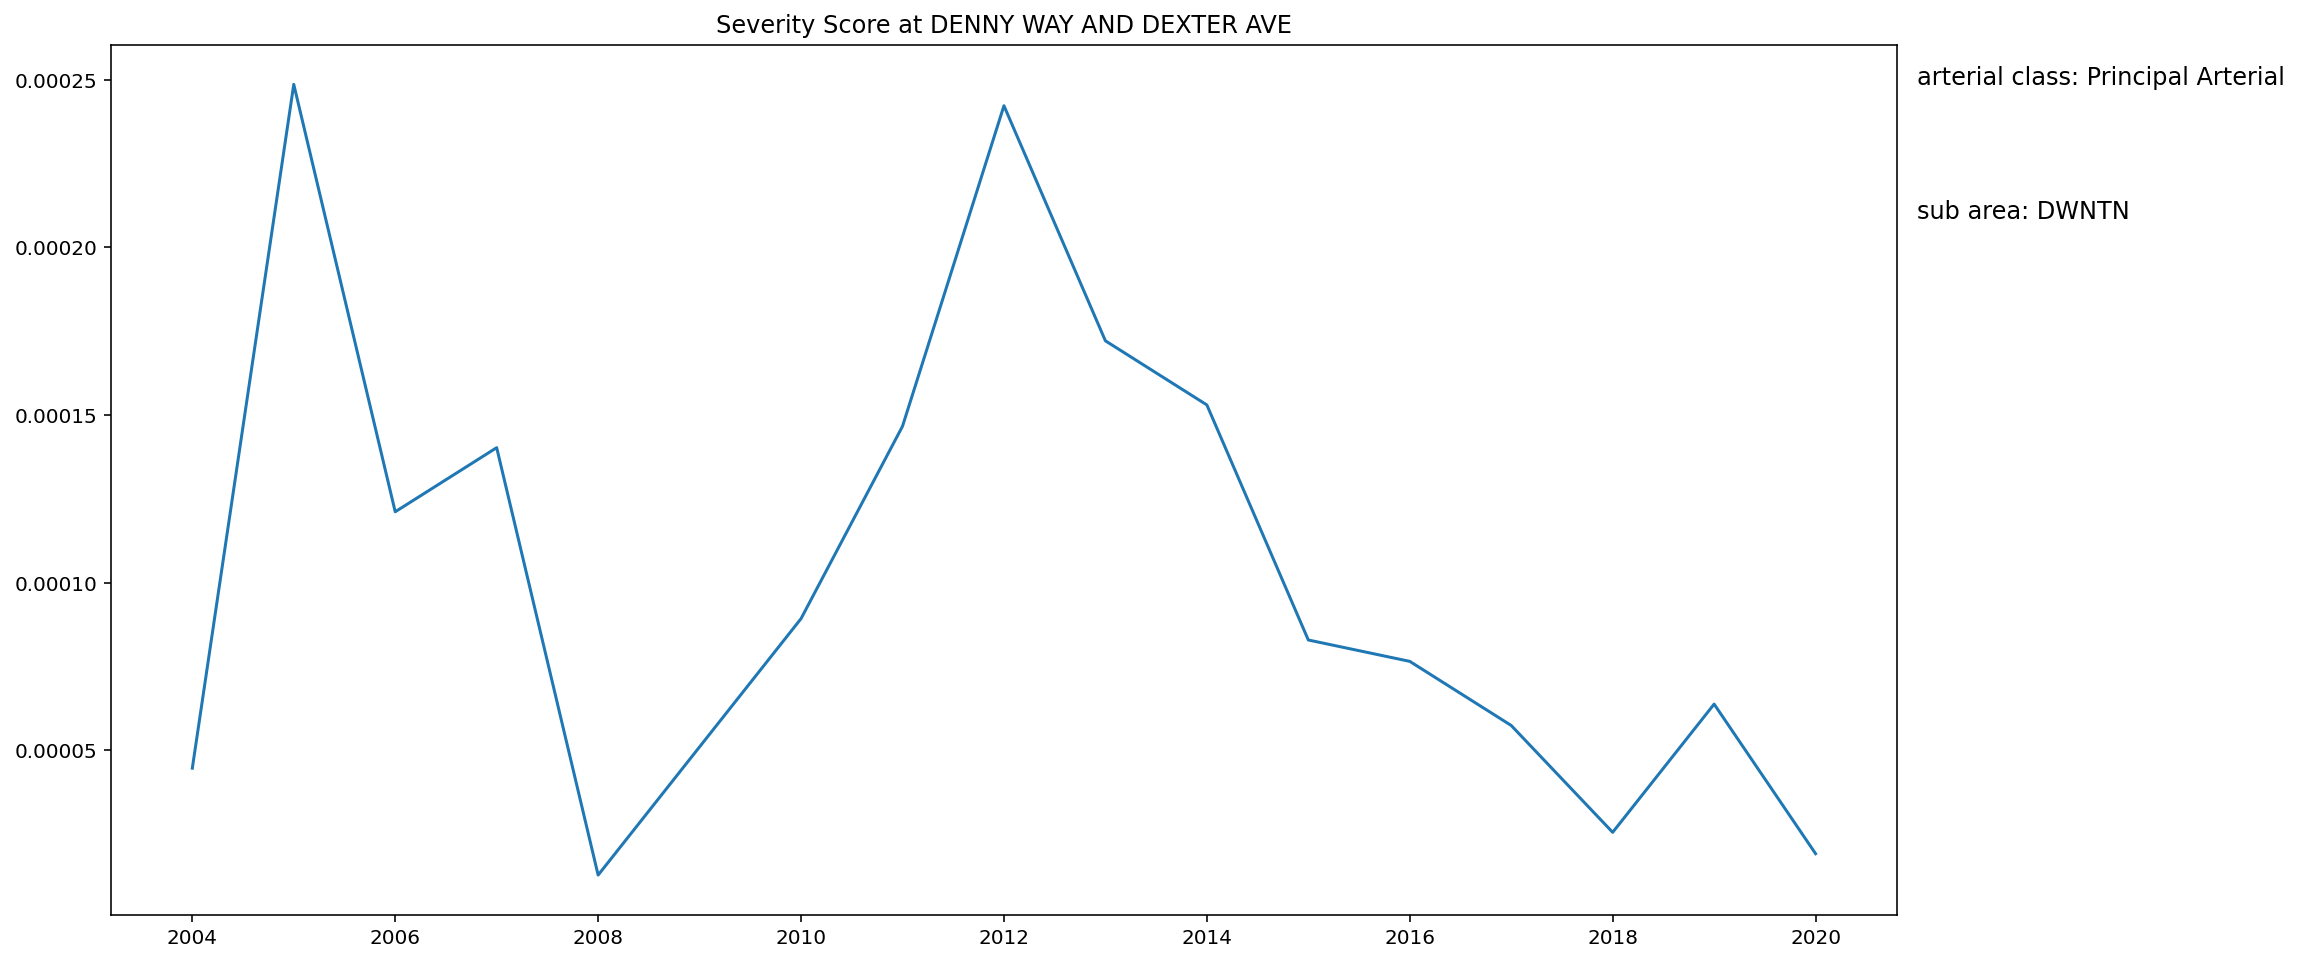

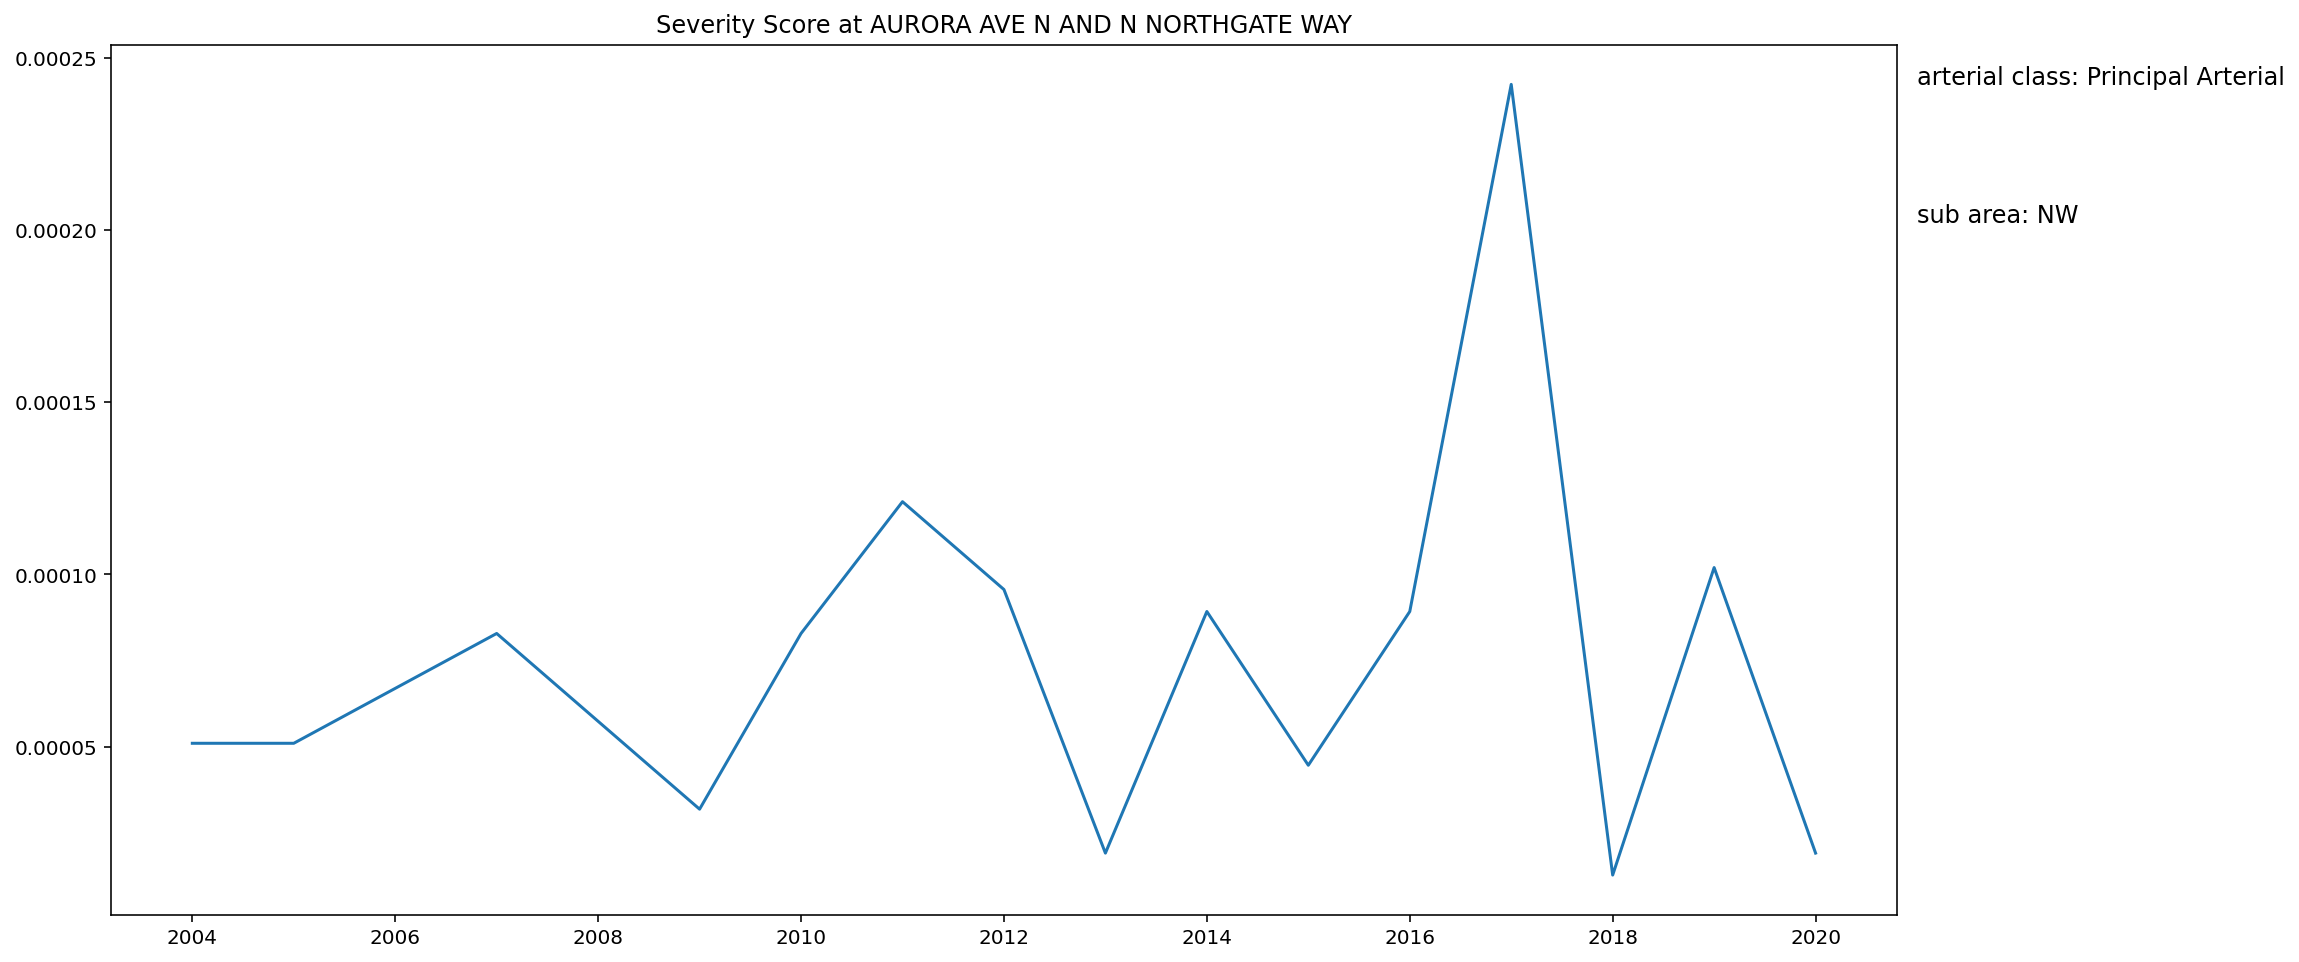

In [137]:
def plot_ints(intkey, loc, fig, ax):
    years = df.loc[intkey].index.get_level_values(level=1)
    ax.plot(years, df.loc[intkey]['sev_score'])
    ax.set_title(f'Severity Score at {loc}')
    
    #arterial class
    art_class = df.loc[intkey]['ARTERIALCLASSCD'][0]
    plt.text(x=2021, y=df.loc[intkey]['sev_score'].max(),s=f"arterial class: {arterials[art_class]}", fontsize=12)
    
    #light_cond
    sub_area = df.loc[intkey]['SUBAREA'][0]
    plt.text(x=2021, y=df.loc[intkey]['sev_score'].max()-.00004,s=f"sub area: {sub_area}", fontsize=12)
    
#fig, ax = plt.subplots(3,2, figsize=(14,14))
seen = []
for idx in most_sev.index:
    if idx[0] not in seen:
        seen.append(idx[0])
        fig, ax = plt.subplots()
        intkey = idx[0]
        loc = idx[1]
        plot_ints(intkey,loc,fig,ax)

        

In [99]:
[print(col) for col in df.columns];

COUNT
SUBAREA
ARTERIALCLASSCD
SIGNAL_TYPE
UNITDESC
WEIGH_FATALITIES
WEIGH_SERIOUS
WEIGH_EVIDENT
WEIGH_POSSIBLE
sev_score
longitude
latitude
OBJECTID
INCKEY
COLDETKEY
REPORTNO
STATUS
ADDRTYPE
EXCEPTRSNCODE
EXCEPTRSNDESC
SEVERITYCODE
SEVERITYDESC
COLLISIONTYPE
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INJURIES
SERIOUSINJURIES
FATALITIES
INCDATE
INCDTTM
JUNCTIONTYPE
SDOT_COLCODE
SDOT_COLDESC
INATTENTIONIND
UNDERINFL
WEATHER_x
ROADCOND
LIGHTCOND
SDOTCOLNUM
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR
JURISDICTION
COUNTY
CITY
INDEXED PRIMARY TRAFFICWAY
PRIMARY TRAFFICWAY
BLOCK NUMBER
MILEPOST
INTERSECTING TRAFFICWAY
DIST FROM REF POINT
MI or FT
COMP DIR FROM REF POINT
REFERENCE POINT NAME
DATE
QTR #
MONTH
FULL TIME
MOST SEVERE SOBRIETY TYPE
MOST SEVERE INJURY TYPE
TOTAL CRASHES
FATAL CRASHES
SERIOUS INJURY CRASHES
EVIDENT INJURY CRASHES
POSSIBLE INJURY CRASHES
PDO - NO INJURY CRASHES
TOTAL FATALITIES
TOTAL SERIOUS INJURIES
TOTAL EVIDENT INJURIES
TOTAL POSSIBLE INJURIES
TOTAL V

In [101]:
df['ARTERIALCLASSCD'].value_counts()

1.0    16102
2.0    10399
0.0     7512
3.0     3945
5.0       34
4.0       11
Name: ARTERIALCLASSCD, dtype: int64

In [7]:
import arviz1avalue_counts